In [1]:
from datetime import datetime, date

import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline
%config InlineBackend.figure_format = "retina"

sns.set(rc={"figure.figsize" : (25, 15)})
sns.set(font_scale=2)
sns.set_style("ticks")

In [2]:
df = pandas.read_csv("troon_instagram_clean_post_data.csv")

In [3]:
df["post_month_num"] = df["post_month"].apply(lambda x : datetime.strptime(x, '%B').month)
df["year"] = df["post_year"].copy()
df["day"] = df["post_day"].copy()
df["month"] = df["post_month_num"].copy()
df["post_date"] = pandas.to_datetime(df[["year", "month", "day"]])
del df["year"]
del df["day"]
del df["month"]

In [4]:
df["Release Duration Group"] = df["release_duration_min"].apply(
    lambda x : np.nan if np.isnan(x) else
    ("Under 1 Minute" if x > 0 and x < 1 else
     ("1 - 59 Minutes" if x >= 1 and x < 60 else
      ("60 - 90 Minutes" if x >= 60 and x <= 90 else
       ("91 - 120 Minutes" if x >= 91 and x <= 120 else "More than 120 Minutes")))))

In [5]:
df.columns

Index(['id', 'URL', 'likes', 'post_weekday', 'post_month', 'post_day',
       'post_year', 'release_post', 'release_duration_min',
       'release_start_hour_24', 'release_end_hour_24',
       'days_since_previous_release', 'release_cans', 'release_pp',
       'beer_name', 'beer_abv', 'beer_description', 'release_preorder',
       'post_month_num', 'post_date', 'Release Duration Group'],
      dtype='object')

In [6]:
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

---

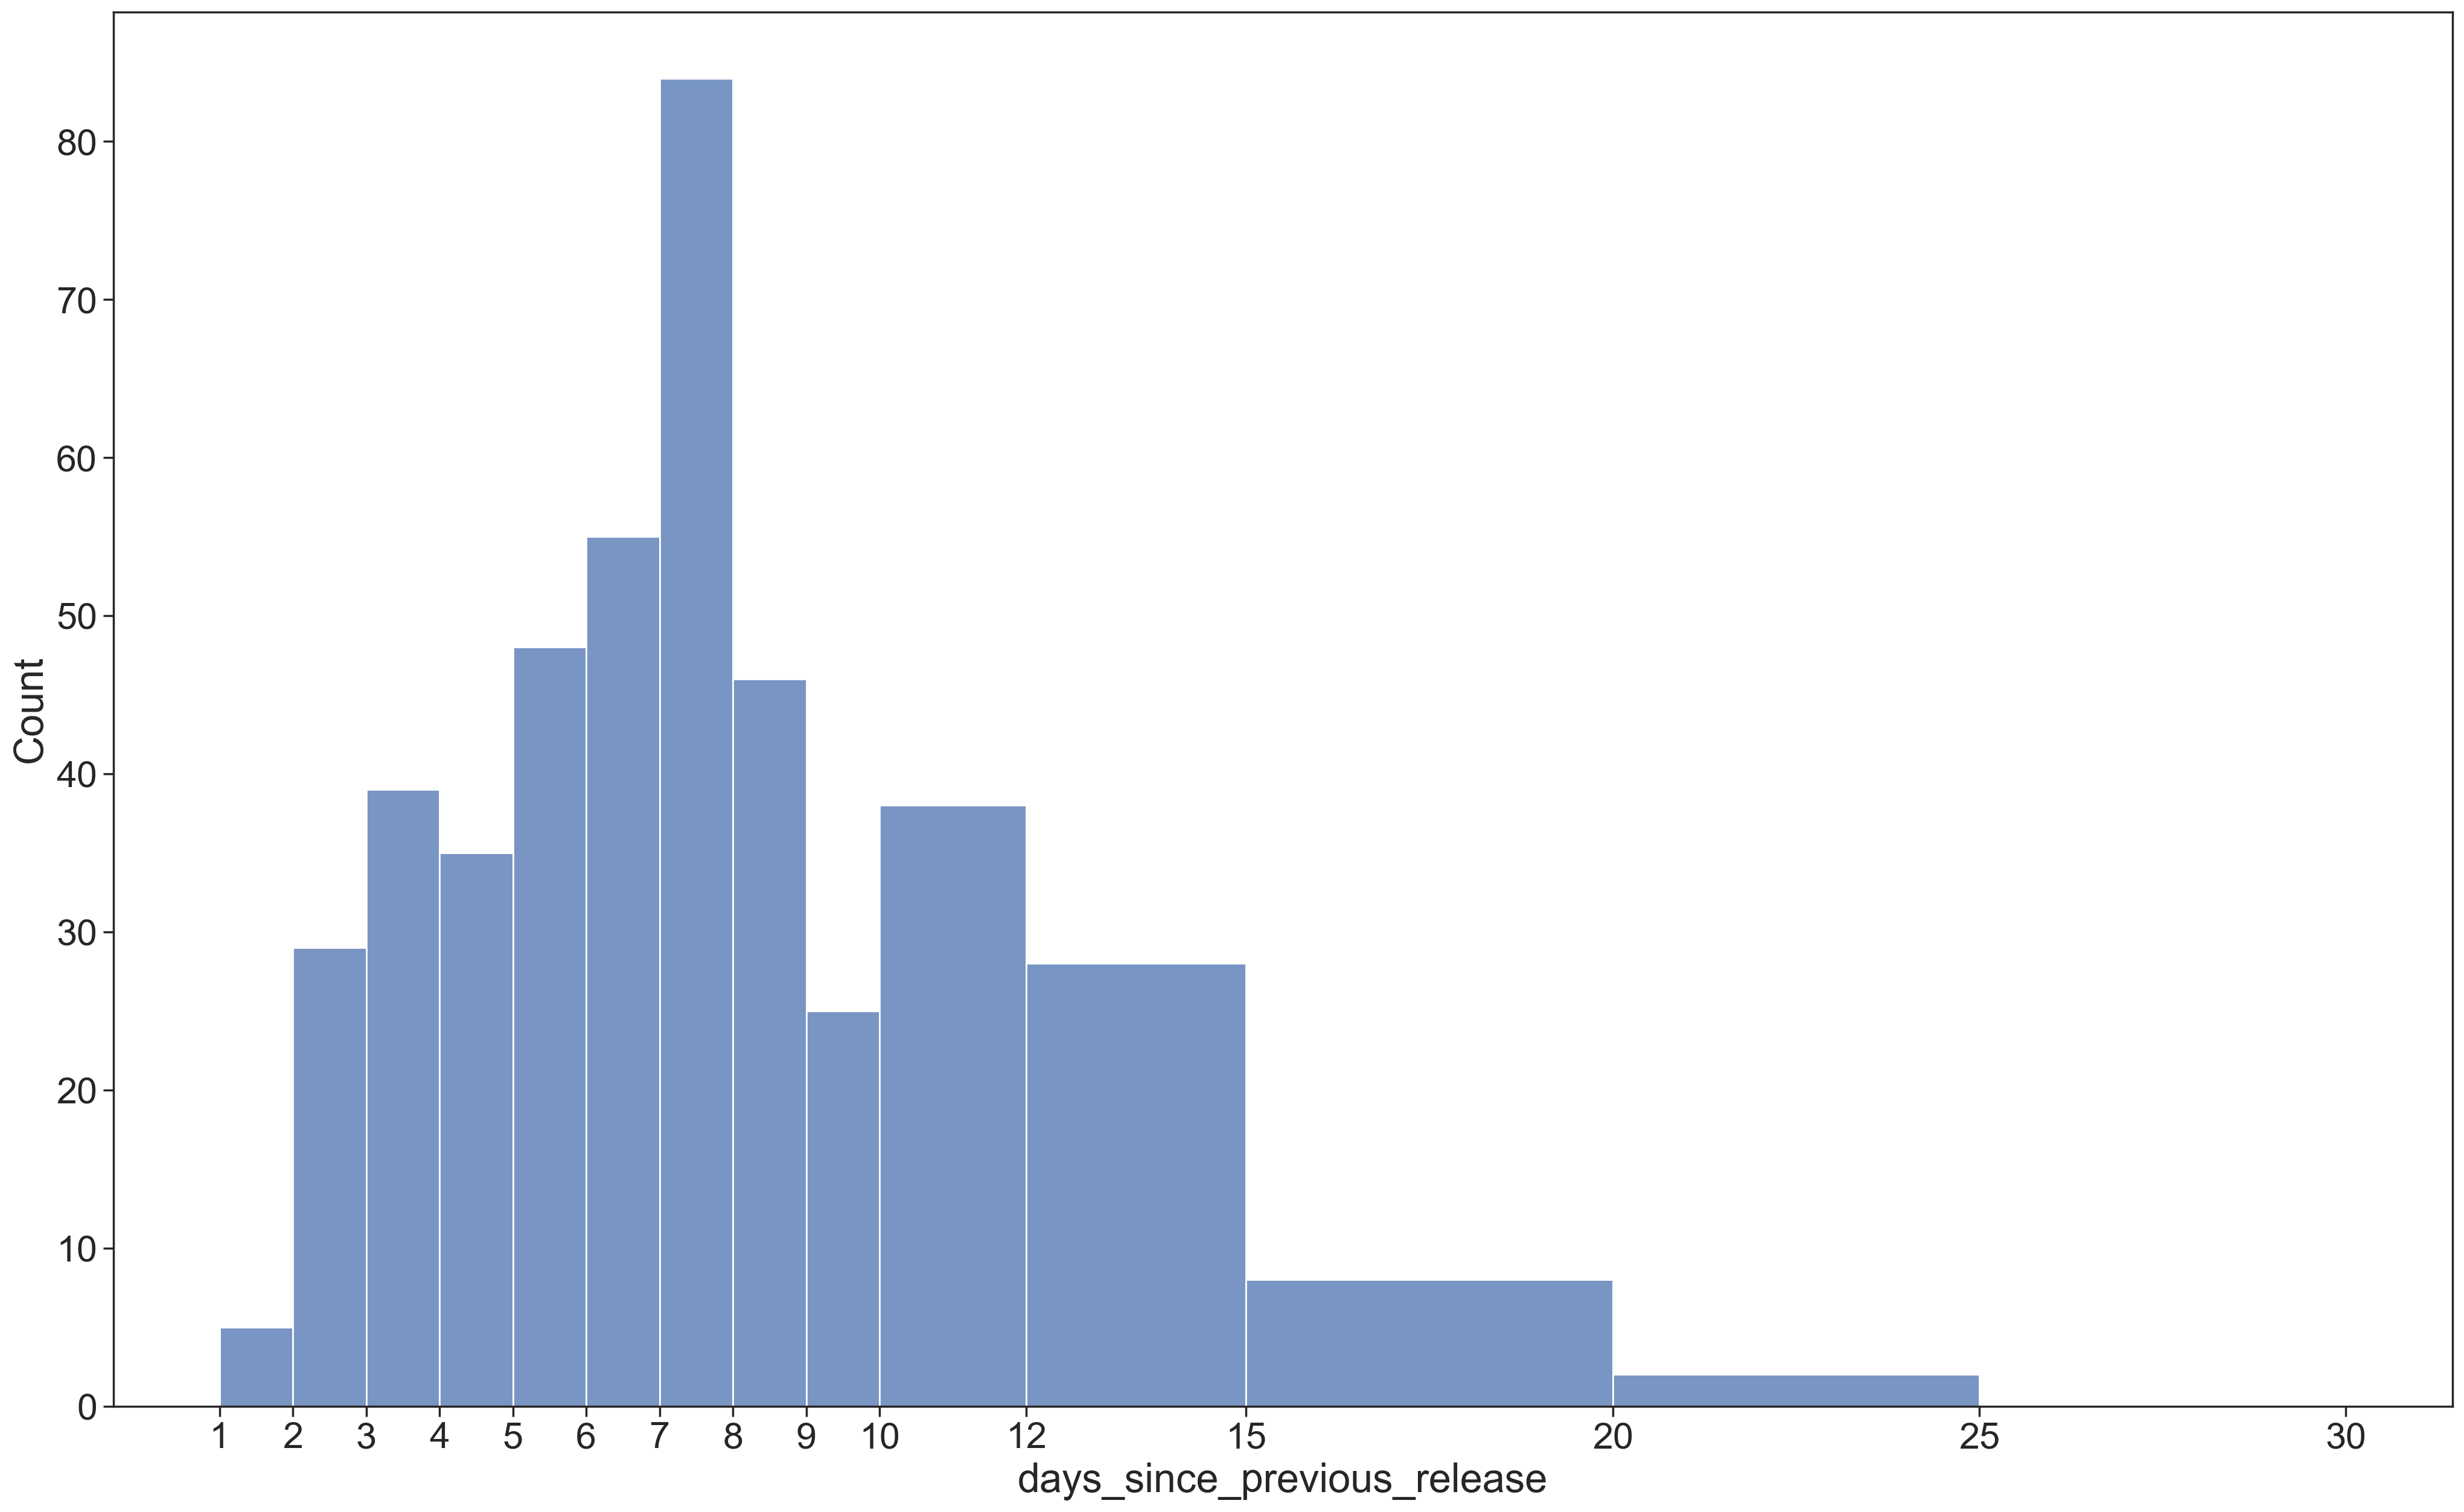

In [7]:
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30]
ax = sns.histplot(x=df[df["release_post"] == True]["days_since_previous_release"], bins=bins)
ax.set_xticks(bins)
plt.show()

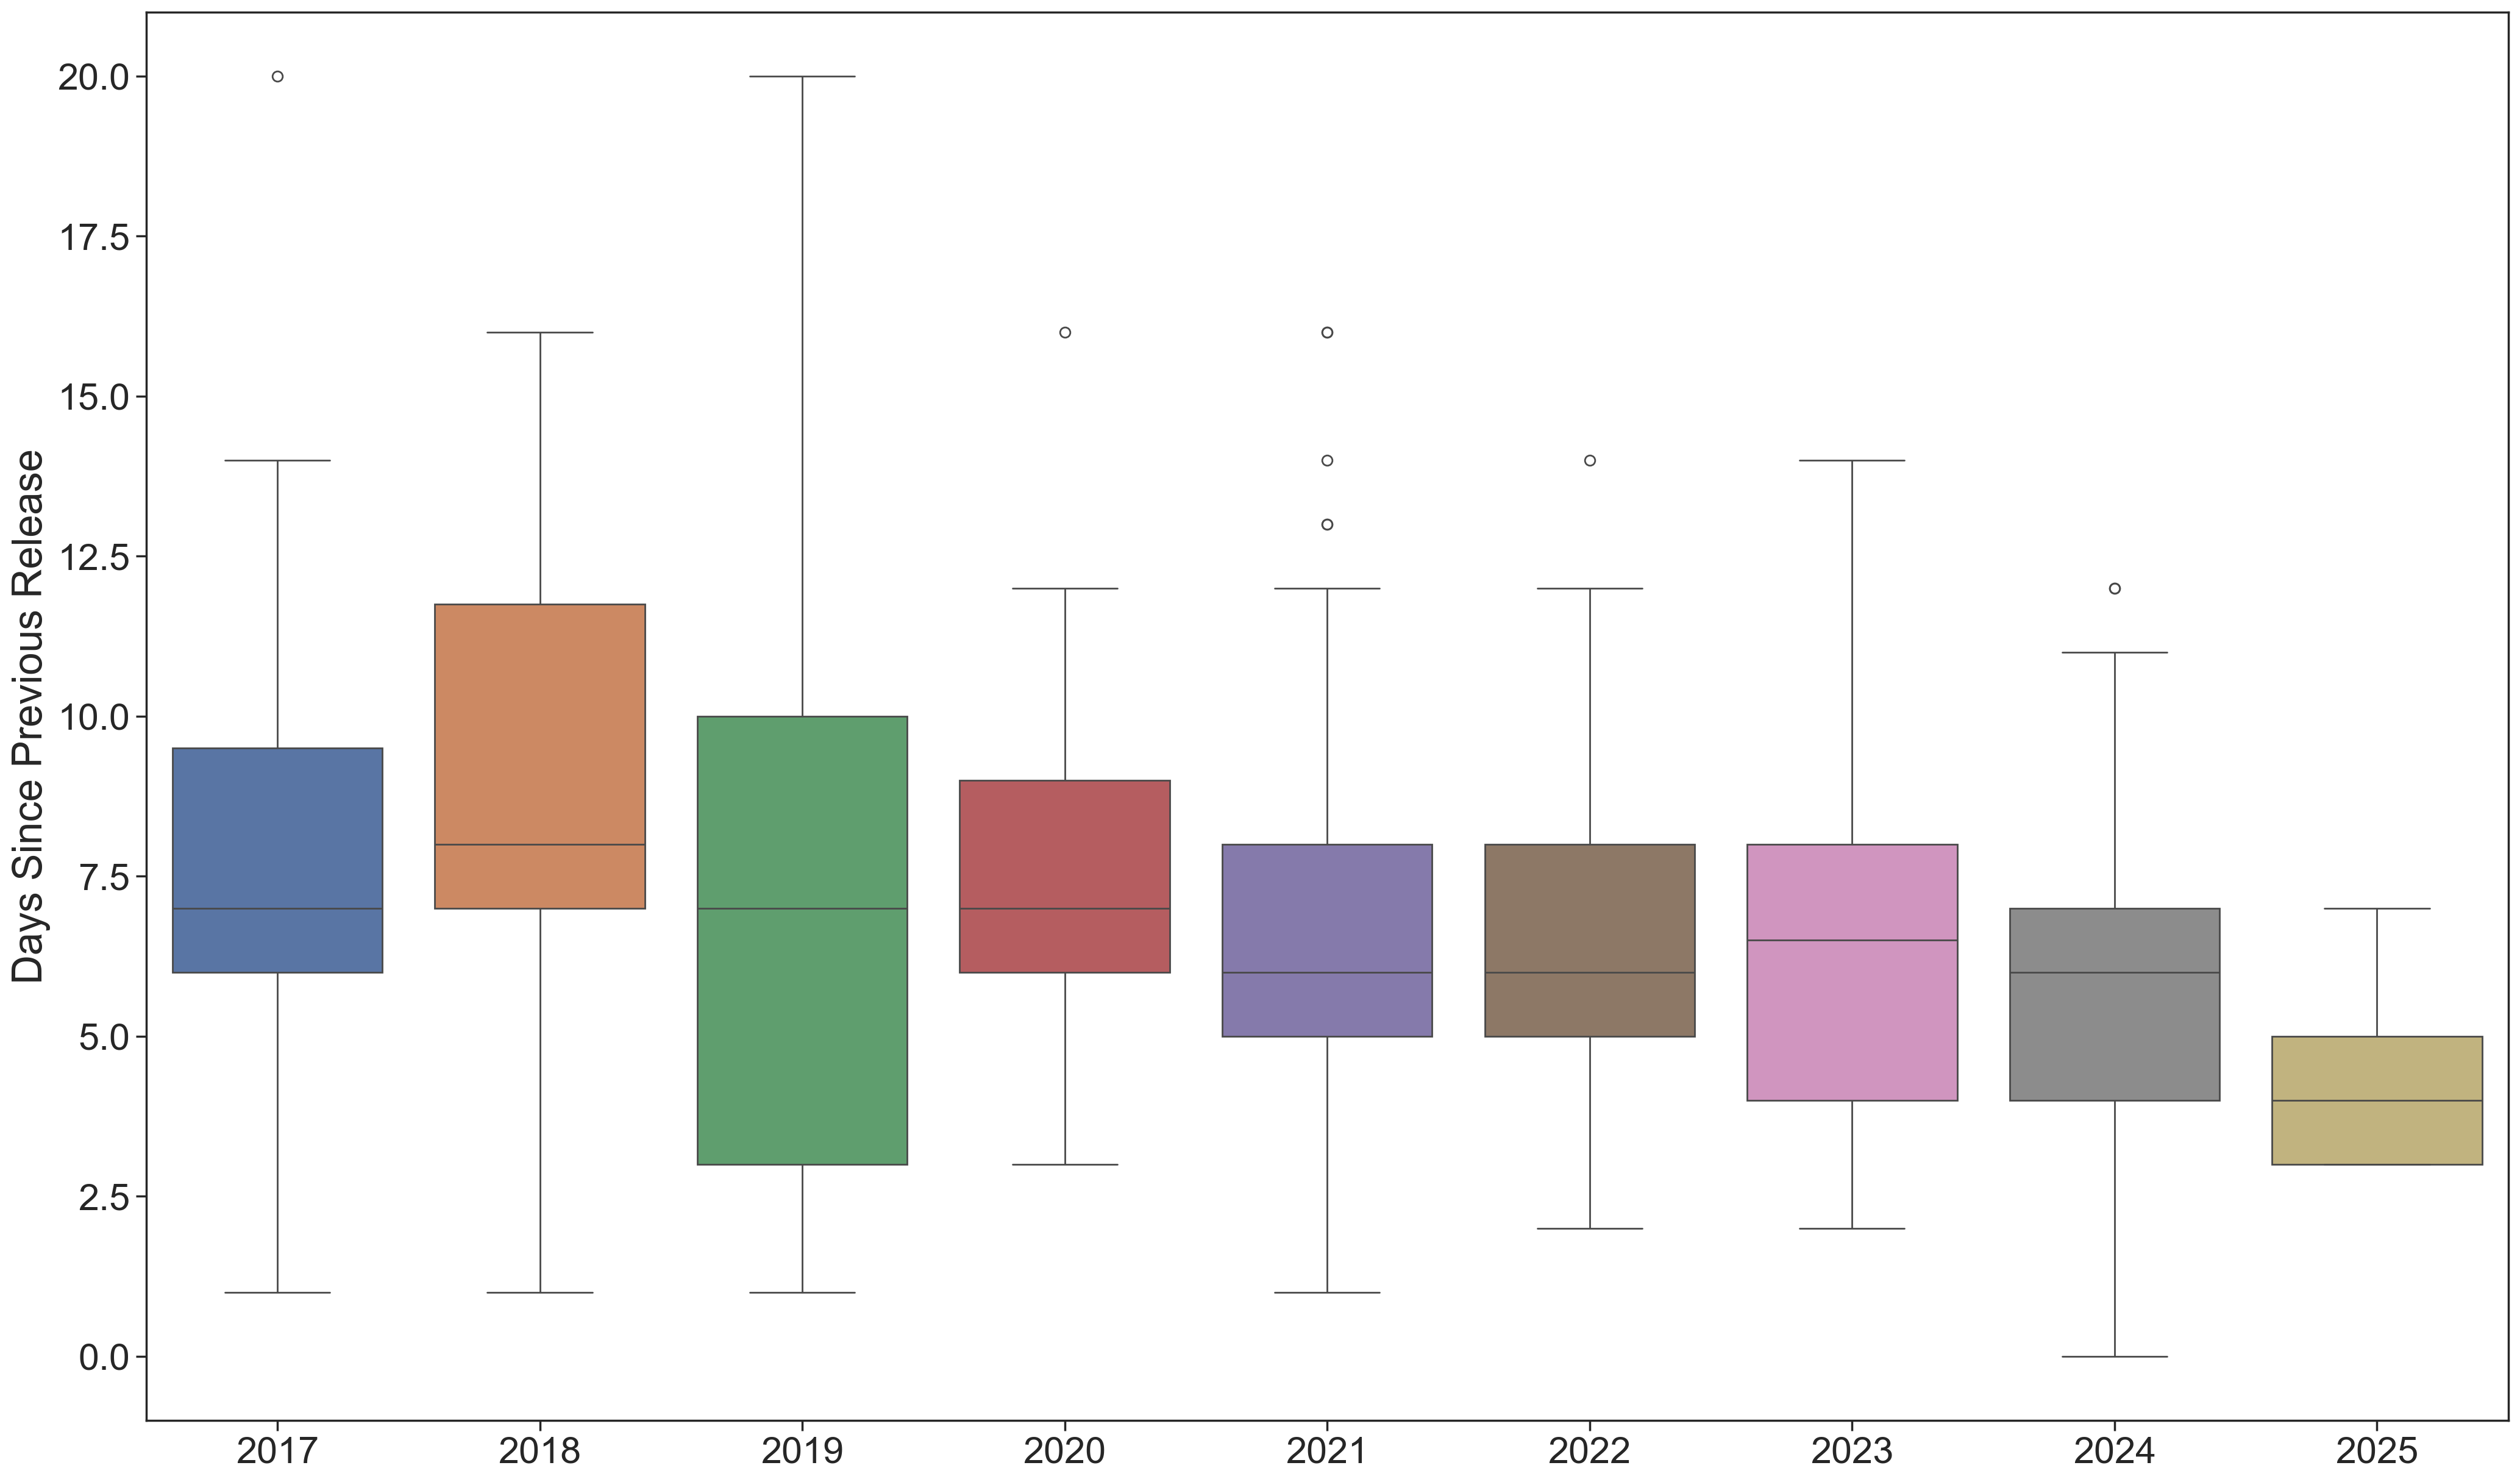

In [8]:
temp = df[df["release_post"] == True].copy()
temp["post_year"] = pandas.Categorical(temp["post_year"])

ax = sns.boxplot(data=temp, x="post_year", y="days_since_previous_release", hue="post_year")
ax.get_legend().set_visible(False)
ax.set_xlabel(None)
ax.set_ylabel("Days Since Previous Release")
plt.show()

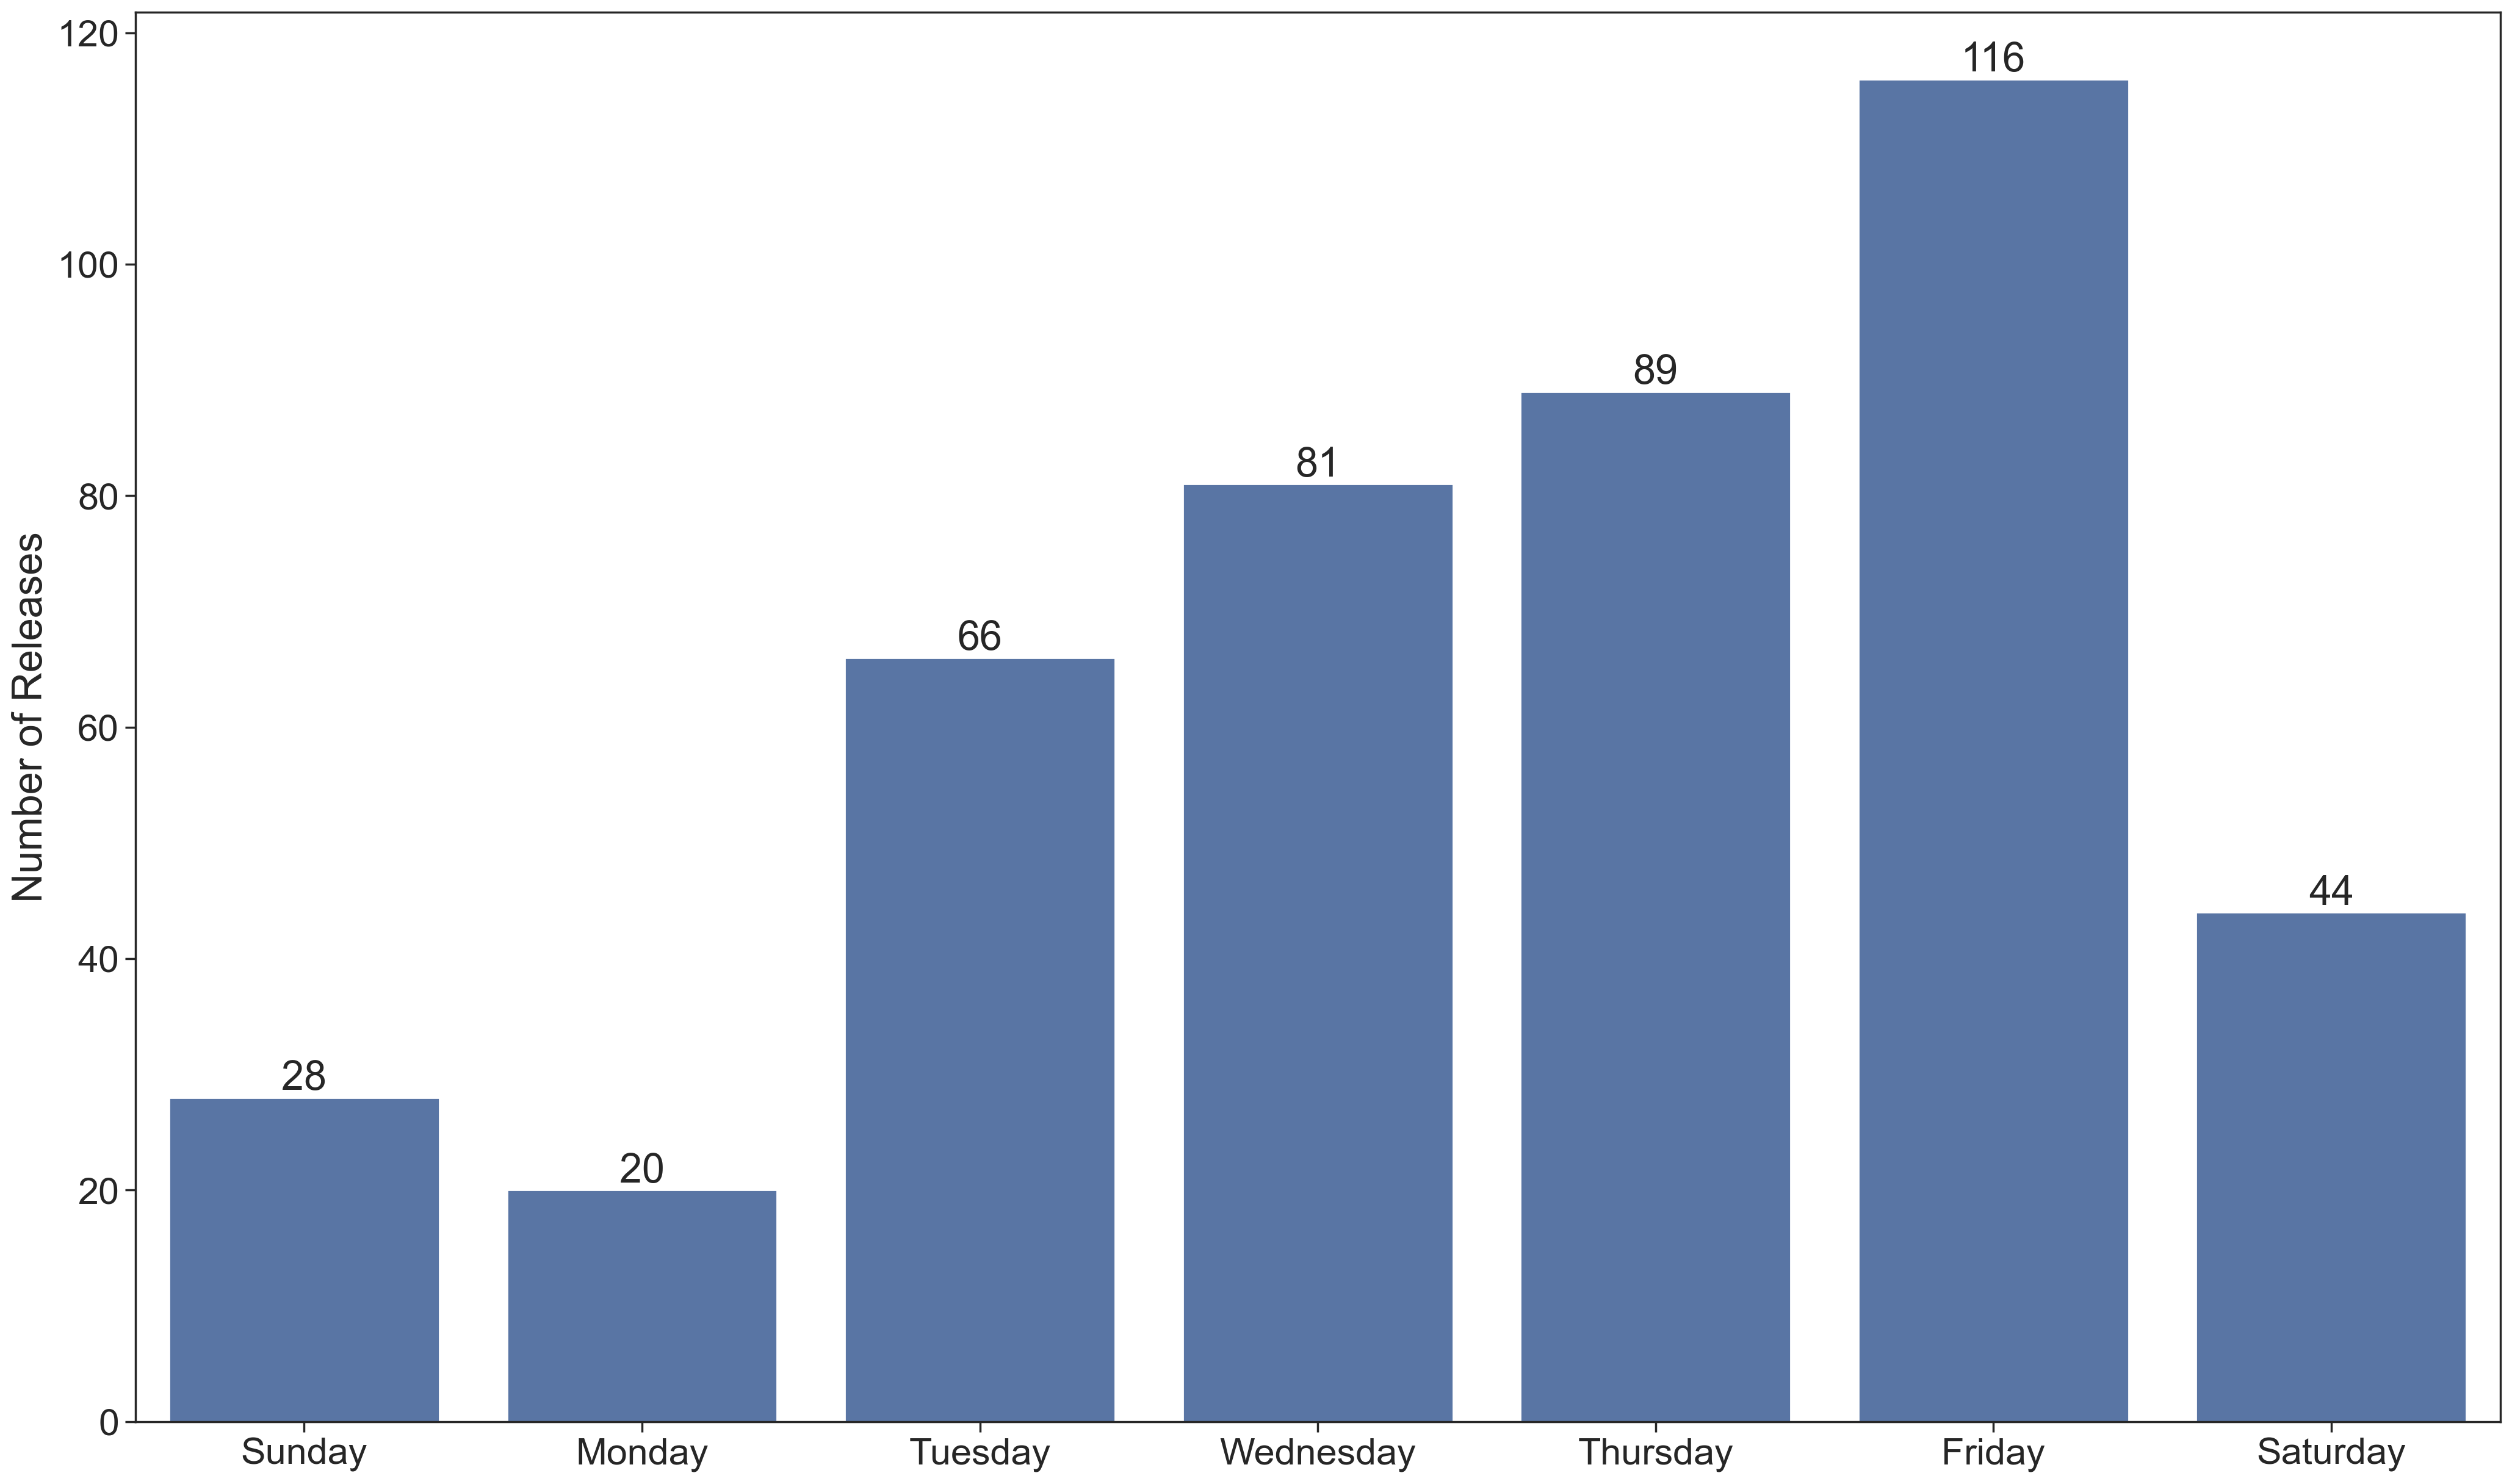

In [9]:
temp = df[df["release_post"] == True]["post_weekday"].value_counts()
counts = [temp[d] for d in order]
ax = sns.barplot(x=order, y=counts)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')
ax.set_ylabel("Number of Releases")
plt.show()

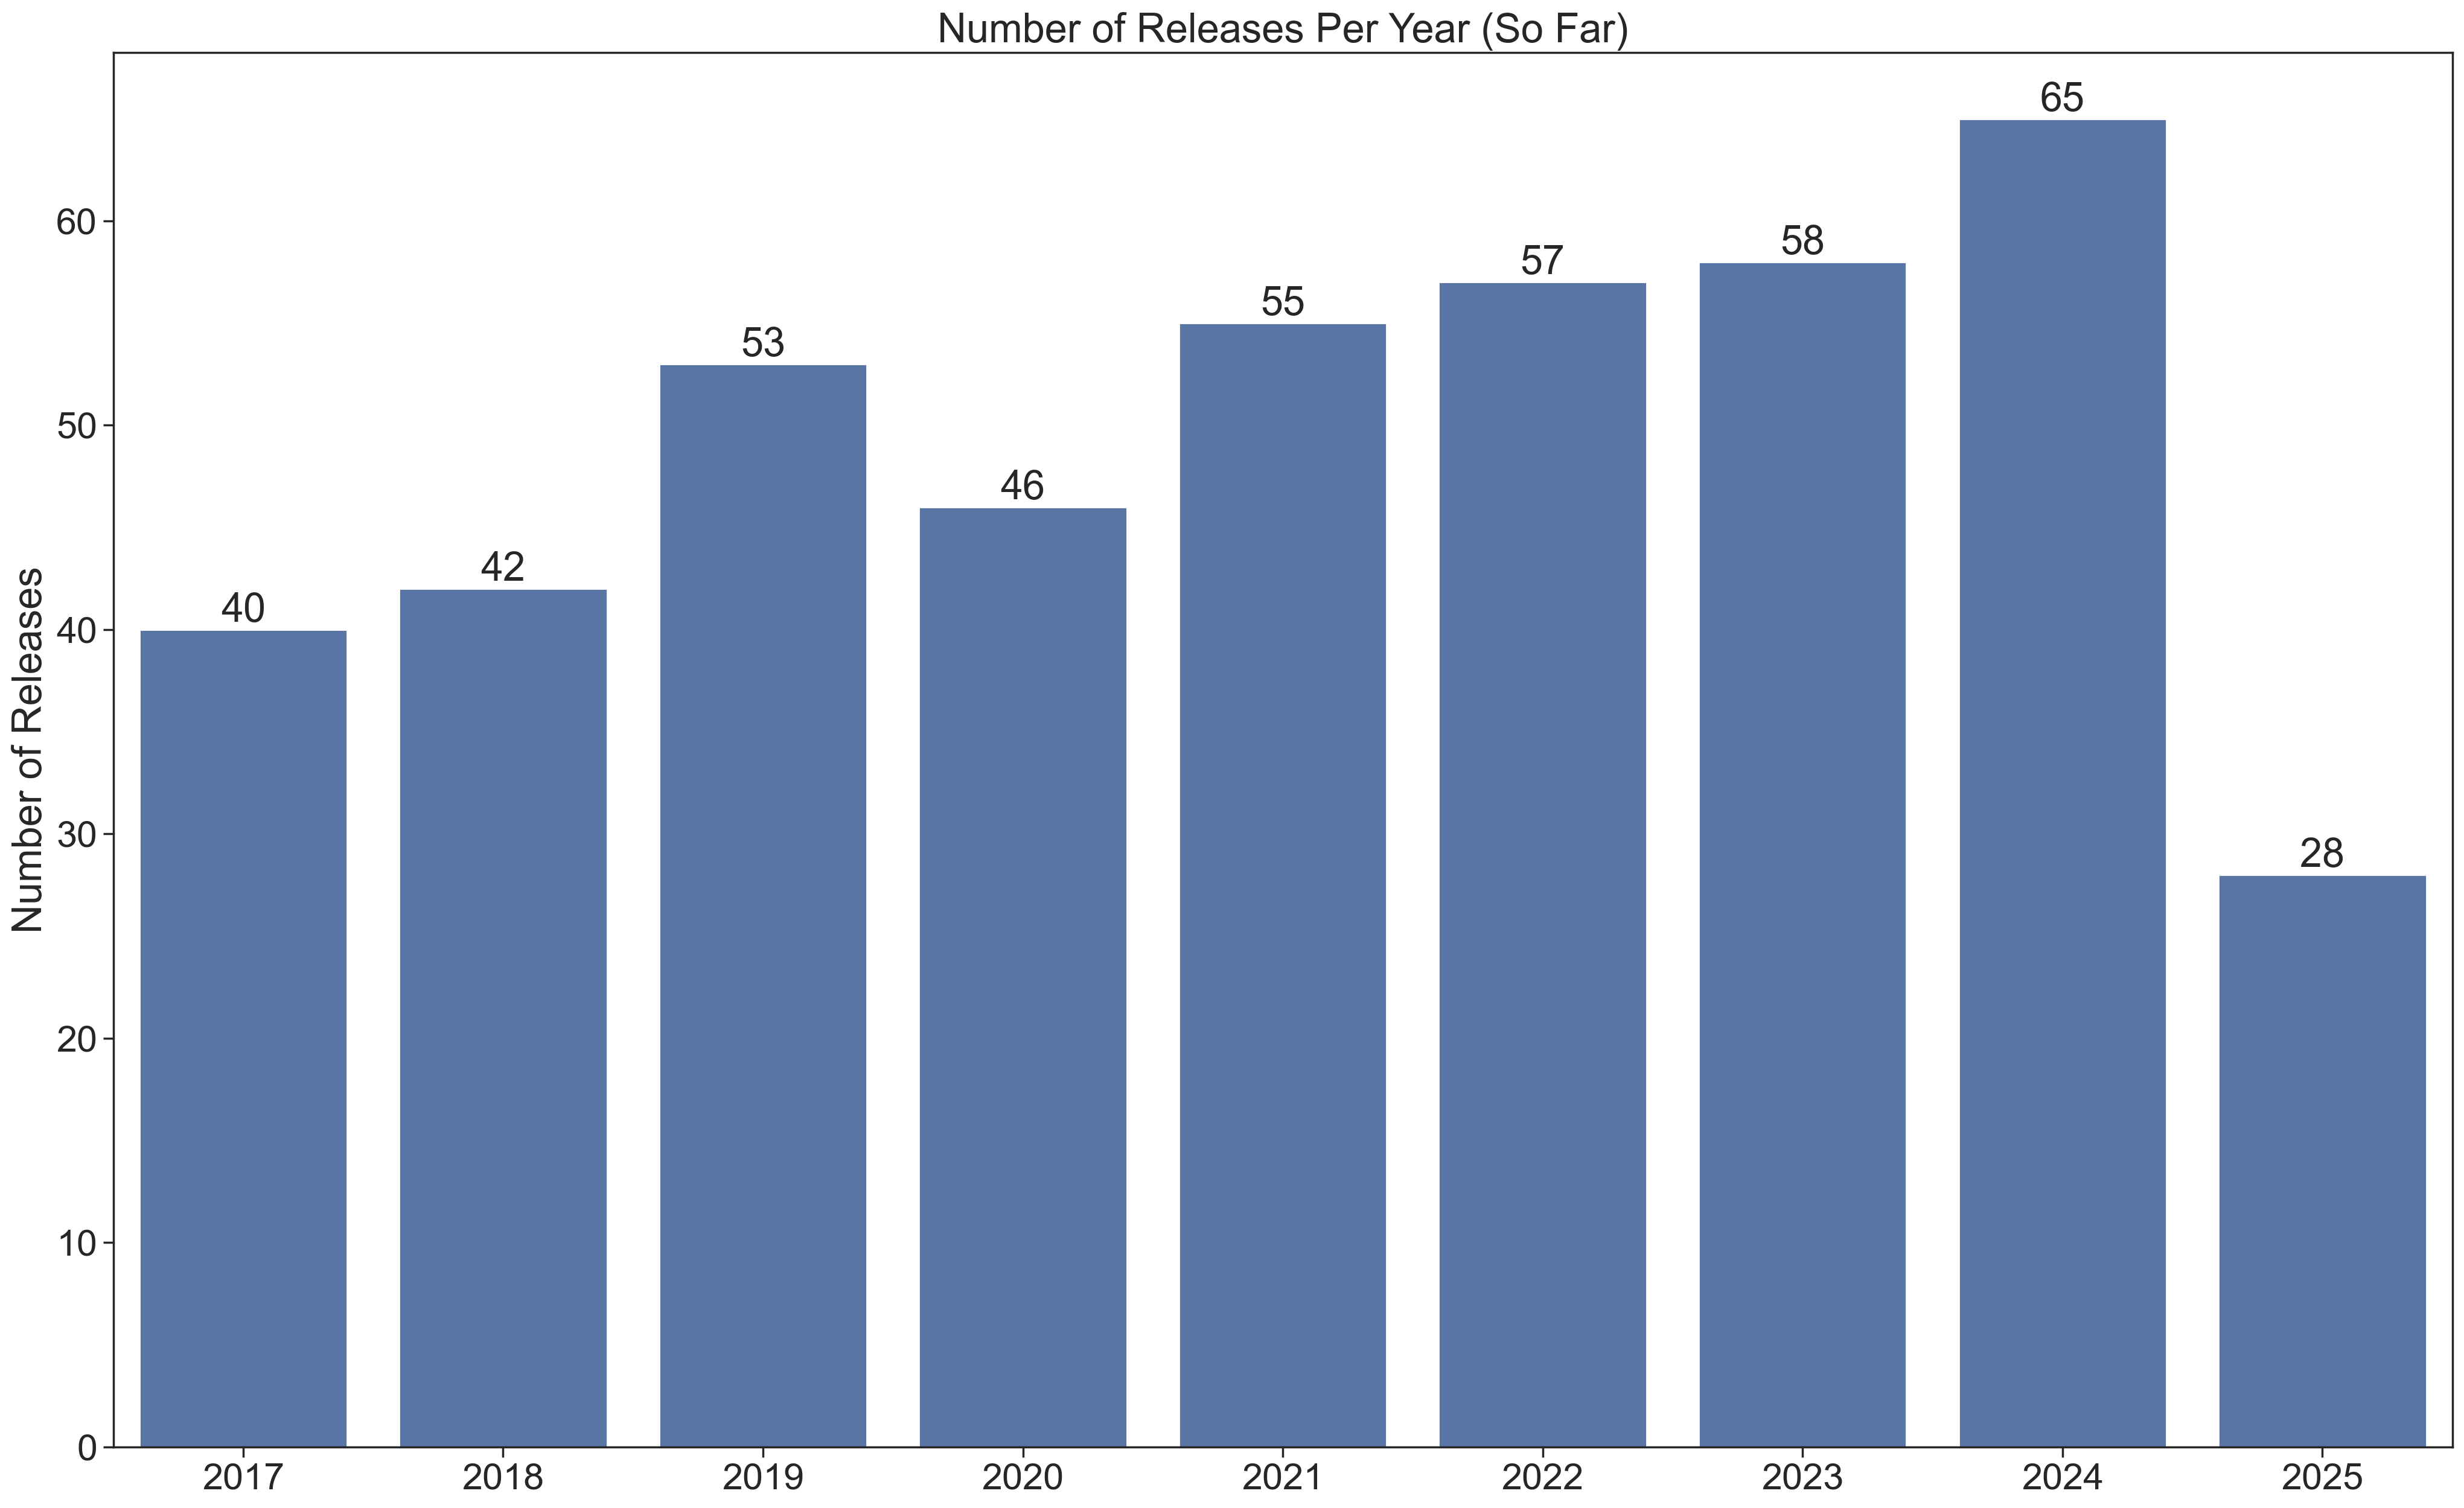

In [10]:
temp = df[df["release_post"] == True]["post_year"].value_counts().sort_index()
ax = sns.barplot(x=temp.index, y=temp.values)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')
ax.set_xlabel(None)
ax.set_title("Number of Releases Per Year (So Far)")
ax.set_ylabel("Number of Releases")
plt.show()

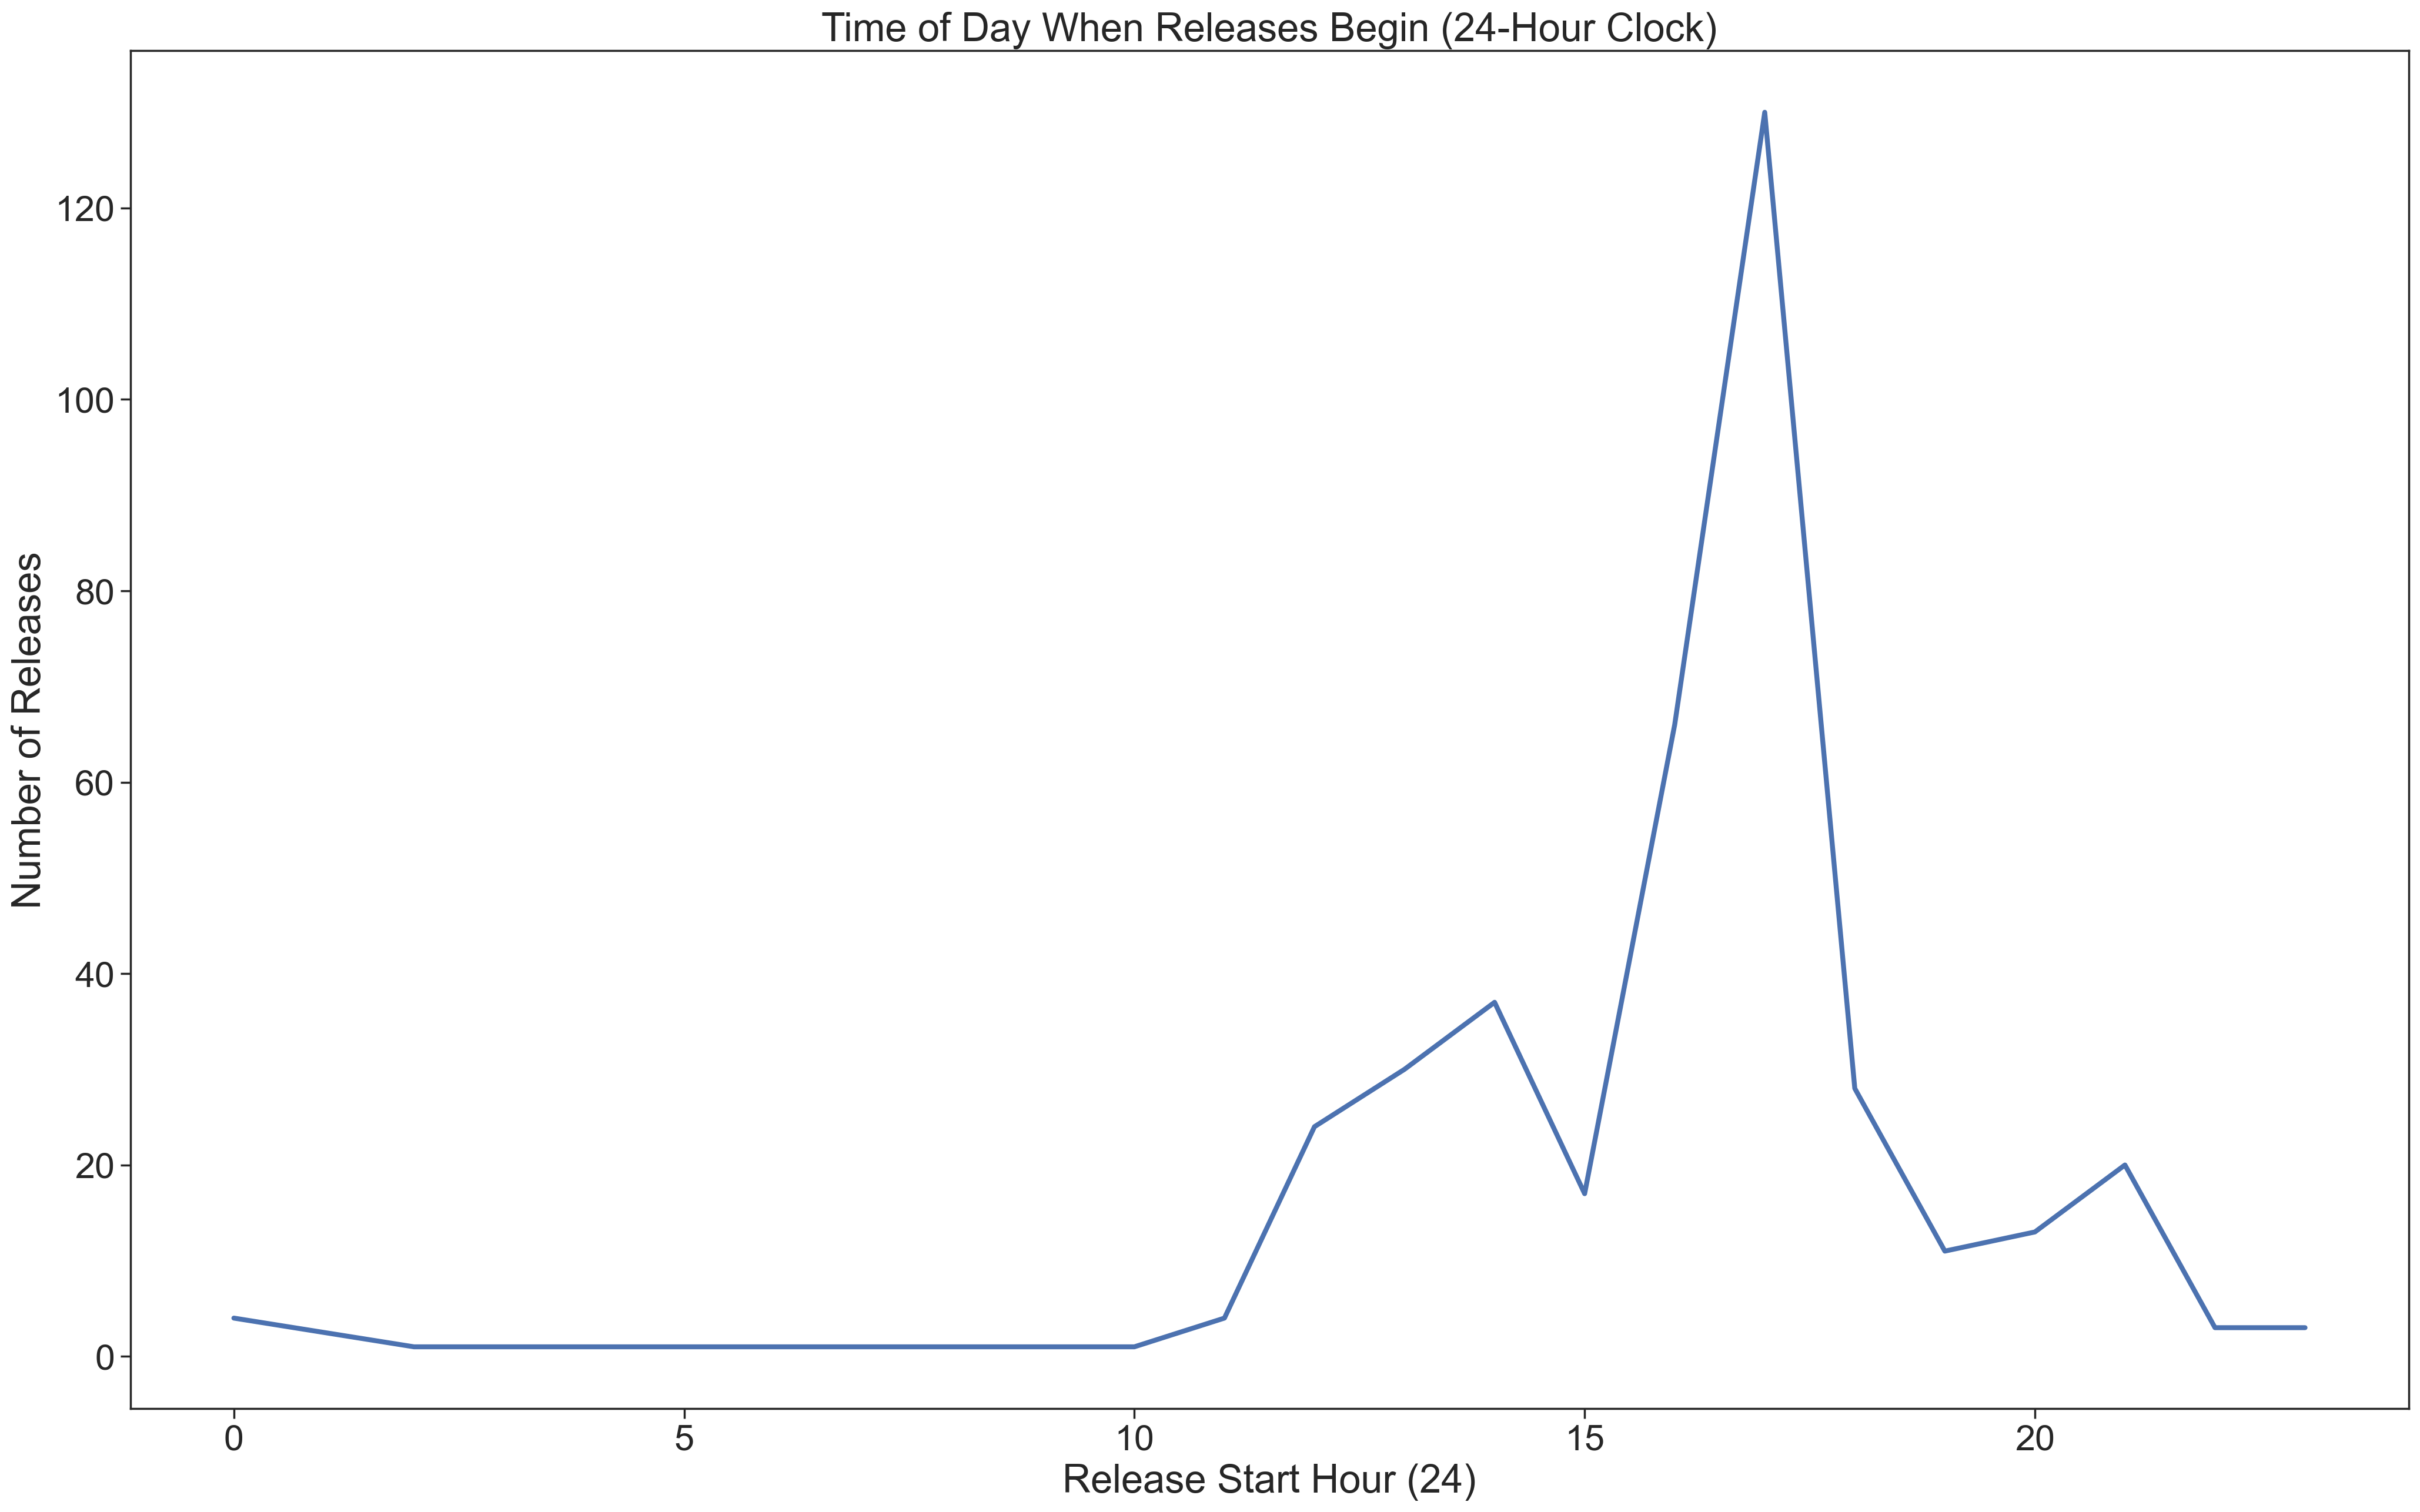

In [11]:
temp = df[df["release_post"] == True]["release_start_hour_24"].value_counts().sort_index()
ax = sns.lineplot(x=temp.index, y=temp.values, linewidth=3)
ax.set_xlabel("Release Start Hour (24)")
ax.set_title("Time of Day When Releases Begin (24-Hour Clock)")
ax.set_ylabel("Number of Releases")
plt.show()

In [12]:
# TODO: release duration isn't being calculated correctly

# temp = df[df["release_post"] == True]["Release Duration Group"].value_counts().sort_index()
# ax = sns.barplot(x=temp.index, y=temp.values)
# for bars in ax.containers:
#     ax.bar_label(bars, fmt='%d')
# ax.set_xlabel(None)
# ax.set_title("Minutes Between Announcement and Selling Out")
# ax.set_ylabel("Number of Releases")
# plt.show()

In [13]:
# TODO: release duration isn't being calculated correctly

# ax = sns.lineplot(data=df[df["release_post"] == True], x="post_date", y="release_duration_min", linewidth=3,
#                   label="Release Duration (Minutes)")
# ax.axvline(datetime(year=2020, month=3, day=15), label="COVID-19 Pandemic Begins", color="tab:orange",
#            linewidth=4)
# ax.axvline(datetime(year=2021, month=3, day=4), label="First Walk-Up Release Since Pandemic Began",
#            color="tab:red", linewidth=4)
# ax.axhline(df[df["release_post"] == True]["release_duration_min"].mean(), linewidth=3, color="tab:grey",
#            label="Average", linestyle="--")
# ax.legend()
# ax.set_title("Amount of Time Before Beer Sells Out, Overall (Minutes)")
# ax.set_xlabel("Release Date")
# ax.set_ylabel("Release Duration (Minutes)")
# plt.show()

In [14]:
# TODO: release duration isn't being calculated correctly

# ax = sns.lineplot(data=df[df["release_post"] == True].query('`post_year` >= 2020'),
#                   x="post_date", y="release_duration_min", linewidth=3,
#                   label="Release Duration (Minutes)")
# ax.axvline(datetime(year=2020, month=3, day=15), label="COVID-19 Pandemic Begins", color="tab:orange",
#            linewidth=4)
# ax.axvline(datetime(year=2021, month=3, day=4), label="First Walk-Up Release Since Pandemic Began",
#            color="tab:red", linewidth=4)
# ax.axhline(df[df["release_post"] == True].query('`post_year` >= 2020')["release_duration_min"].mean(),
#            linewidth=3, color="tab:grey", label="Average", linestyle="--")
# ax.legend()
# ax.set_title("Amount of Time Before Beer Sells Out, 2020 - Present (Minutes)")
# ax.set_xlabel("Release Date")
# ax.set_ylabel("Release Duration (Minutes)")
# plt.show()

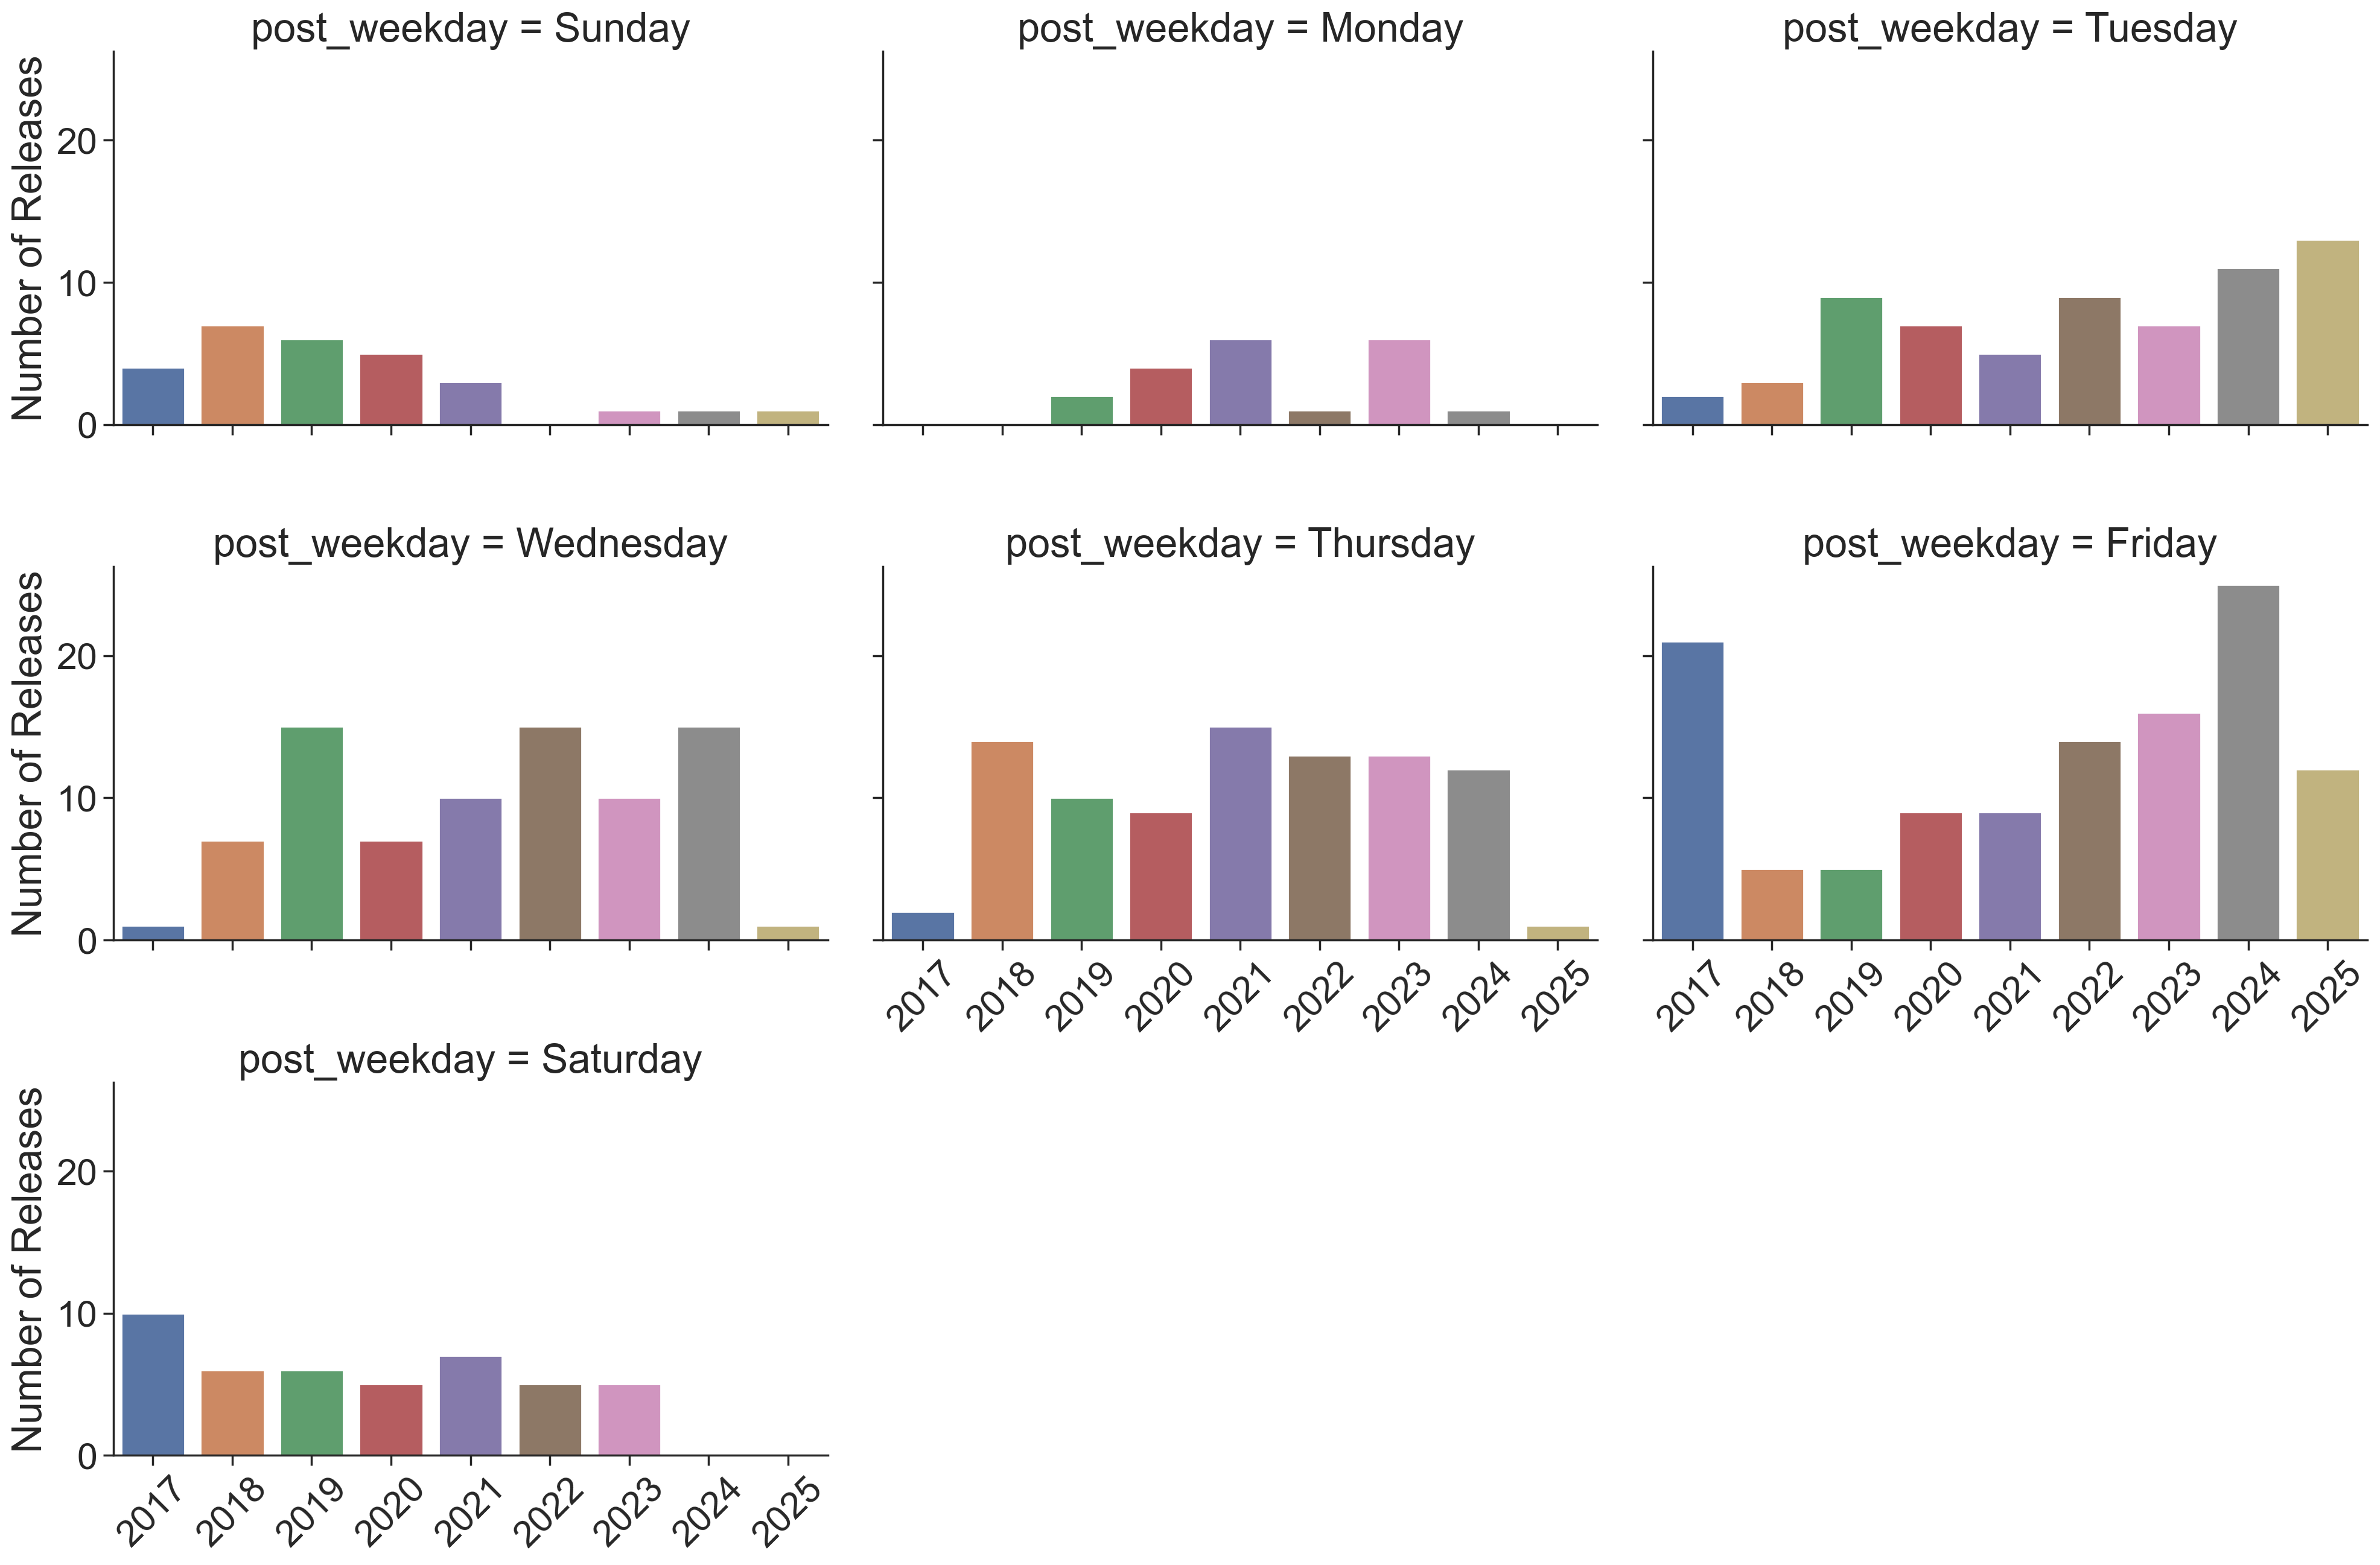

In [28]:
temp = df[df["release_post"] == True].groupby(["post_year", "post_weekday"]).size().rename(
    "Number of Releases").reset_index()
g = sns.FacetGrid(temp, col="post_weekday", col_wrap=3, aspect=1.5, height=4.5, col_order=order, hue="post_year")
g.map(sns.barplot, "post_year", "Number of Releases", order=sorted(set(temp["post_year"])))
g.set_xlabels("")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()

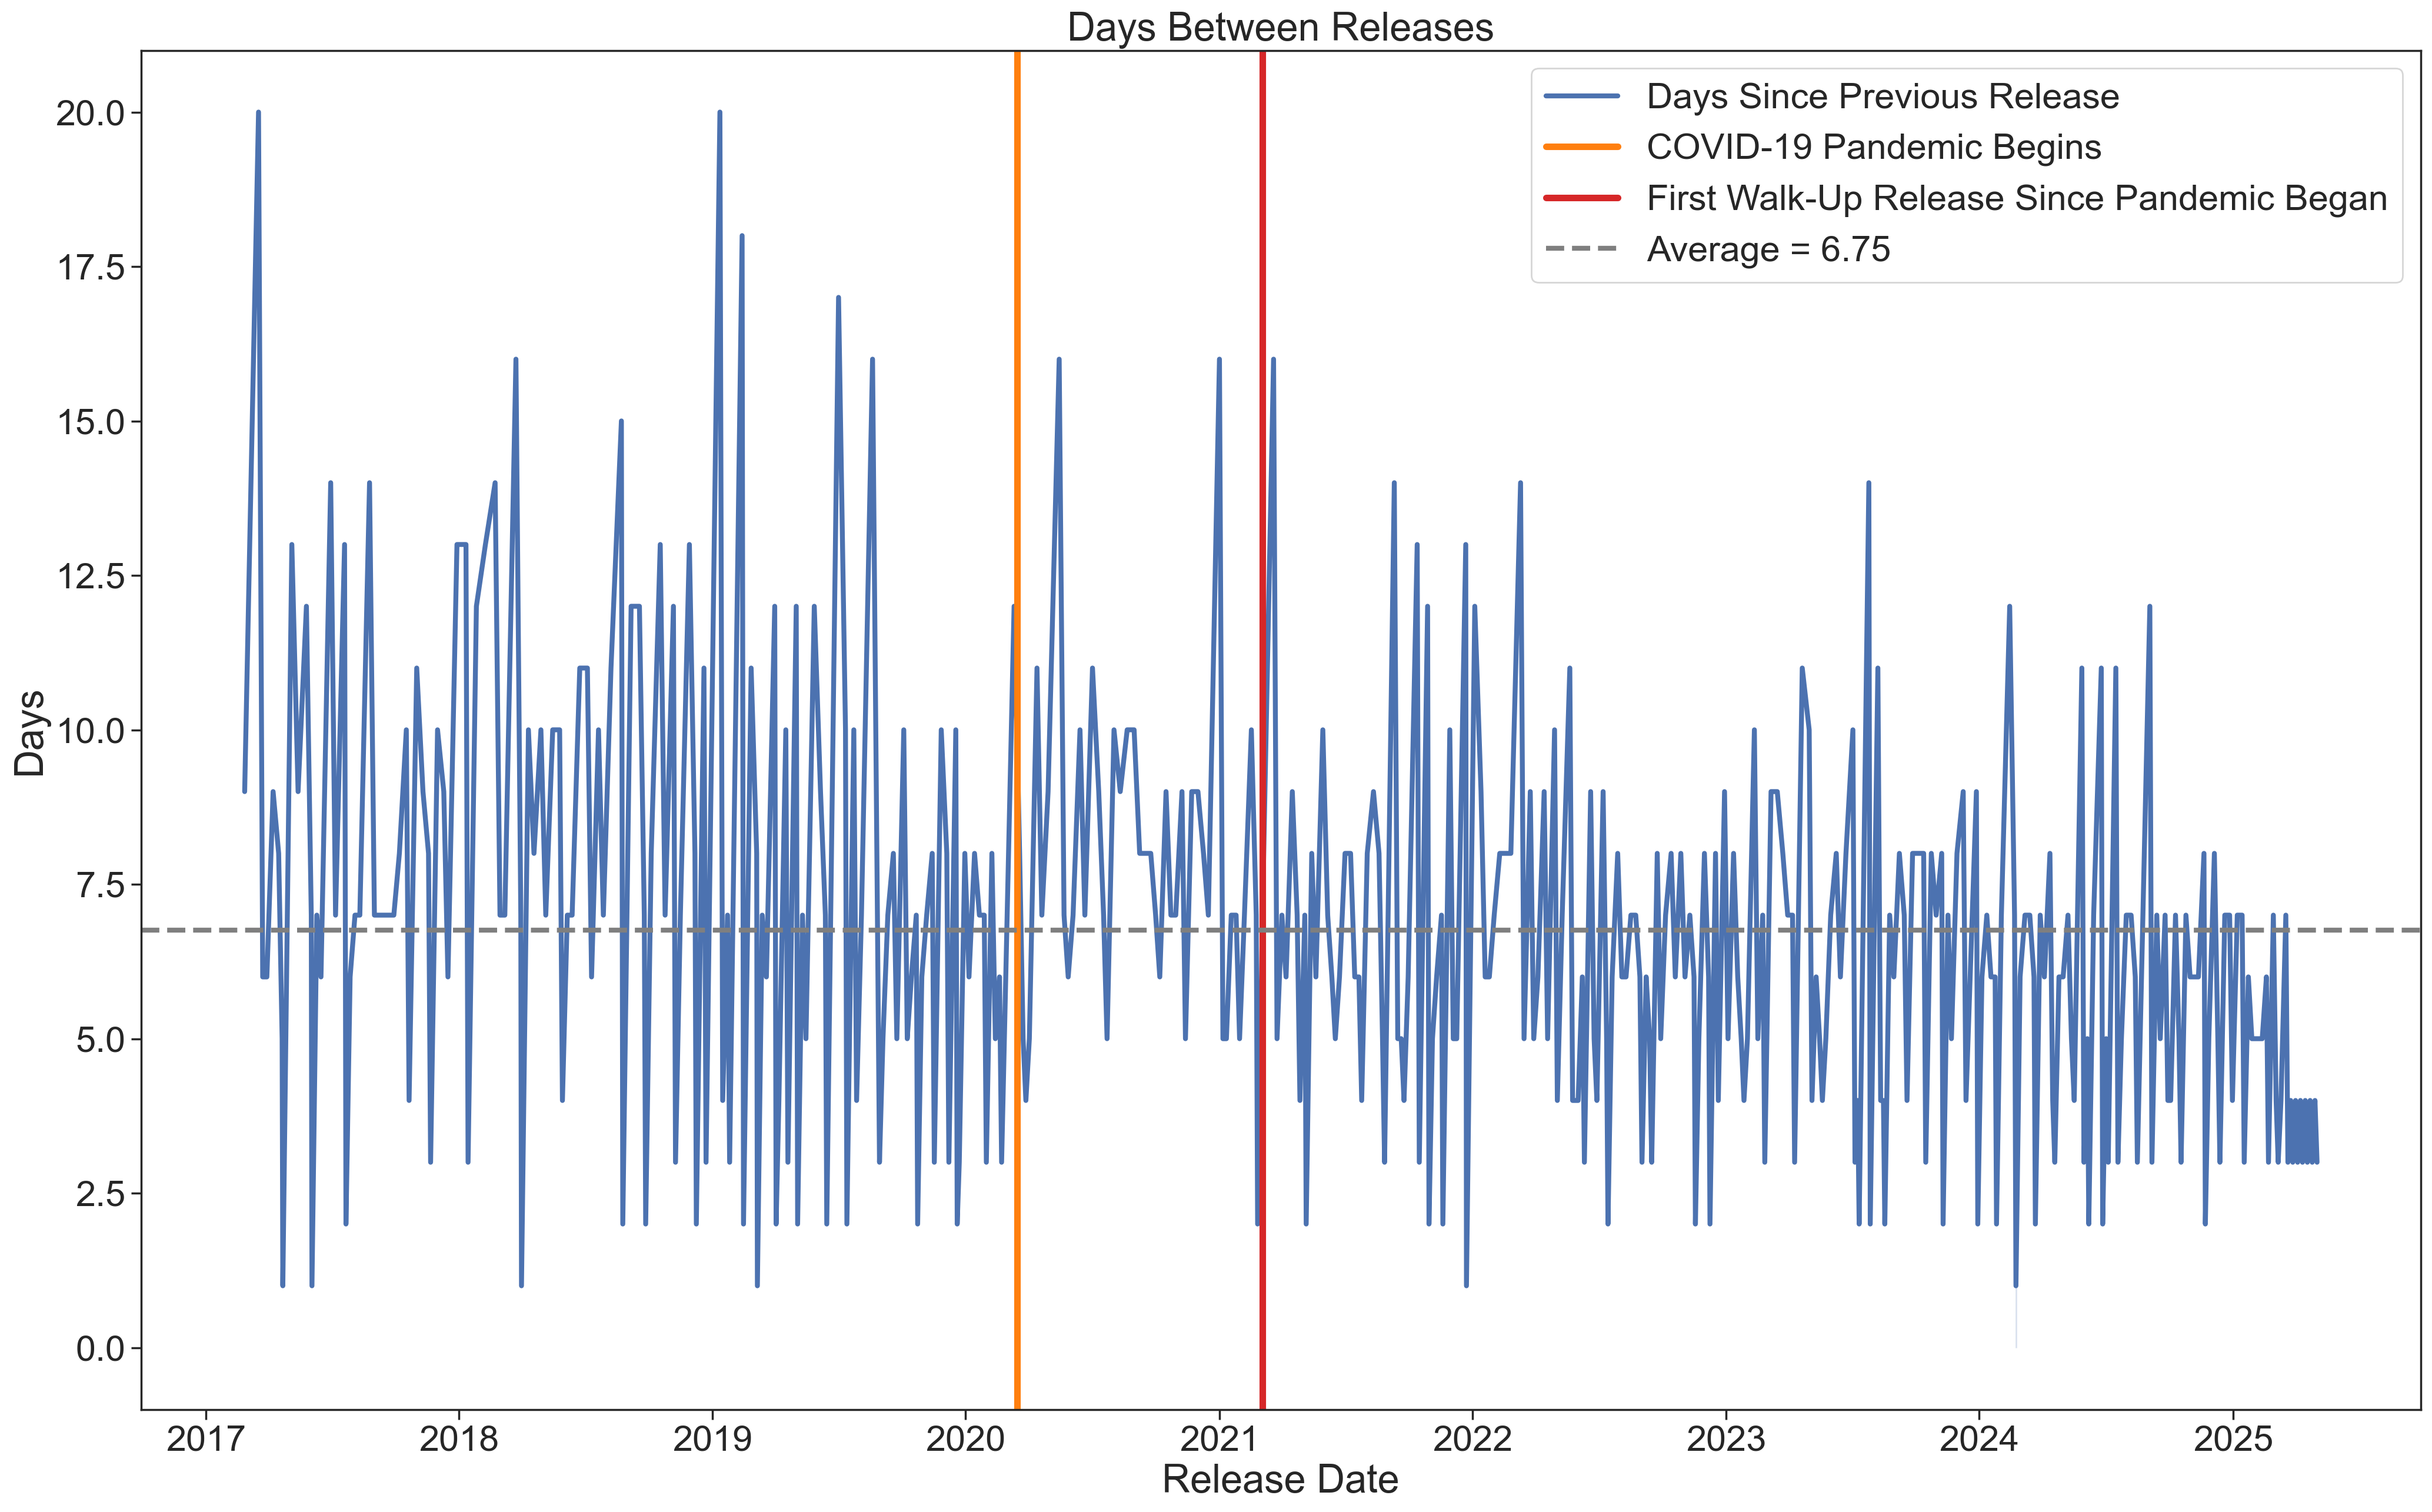

In [16]:
ax = sns.lineplot(data=df[df["release_post"] == True], x="post_date", y="days_since_previous_release", linewidth=3,
                  label="Days Since Previous Release")
ax.axvline(datetime(year=2020, month=3, day=15), label="COVID-19 Pandemic Begins", color="tab:orange",
           linewidth=4)
ax.axvline(datetime(year=2021, month=3, day=4), label="First Walk-Up Release Since Pandemic Began",
           color="tab:red", linewidth=4)
avg = df[df["release_post"] == True]["days_since_previous_release"].mean()
ax.axhline(avg, linewidth=3, color="tab:grey", label="Average = {}".format(round(avg, 2)), linestyle="--")
ax.legend()
ax.set_title("Days Between Releases")
ax.set_xlabel("Release Date")
ax.set_ylabel("Days")
plt.show()

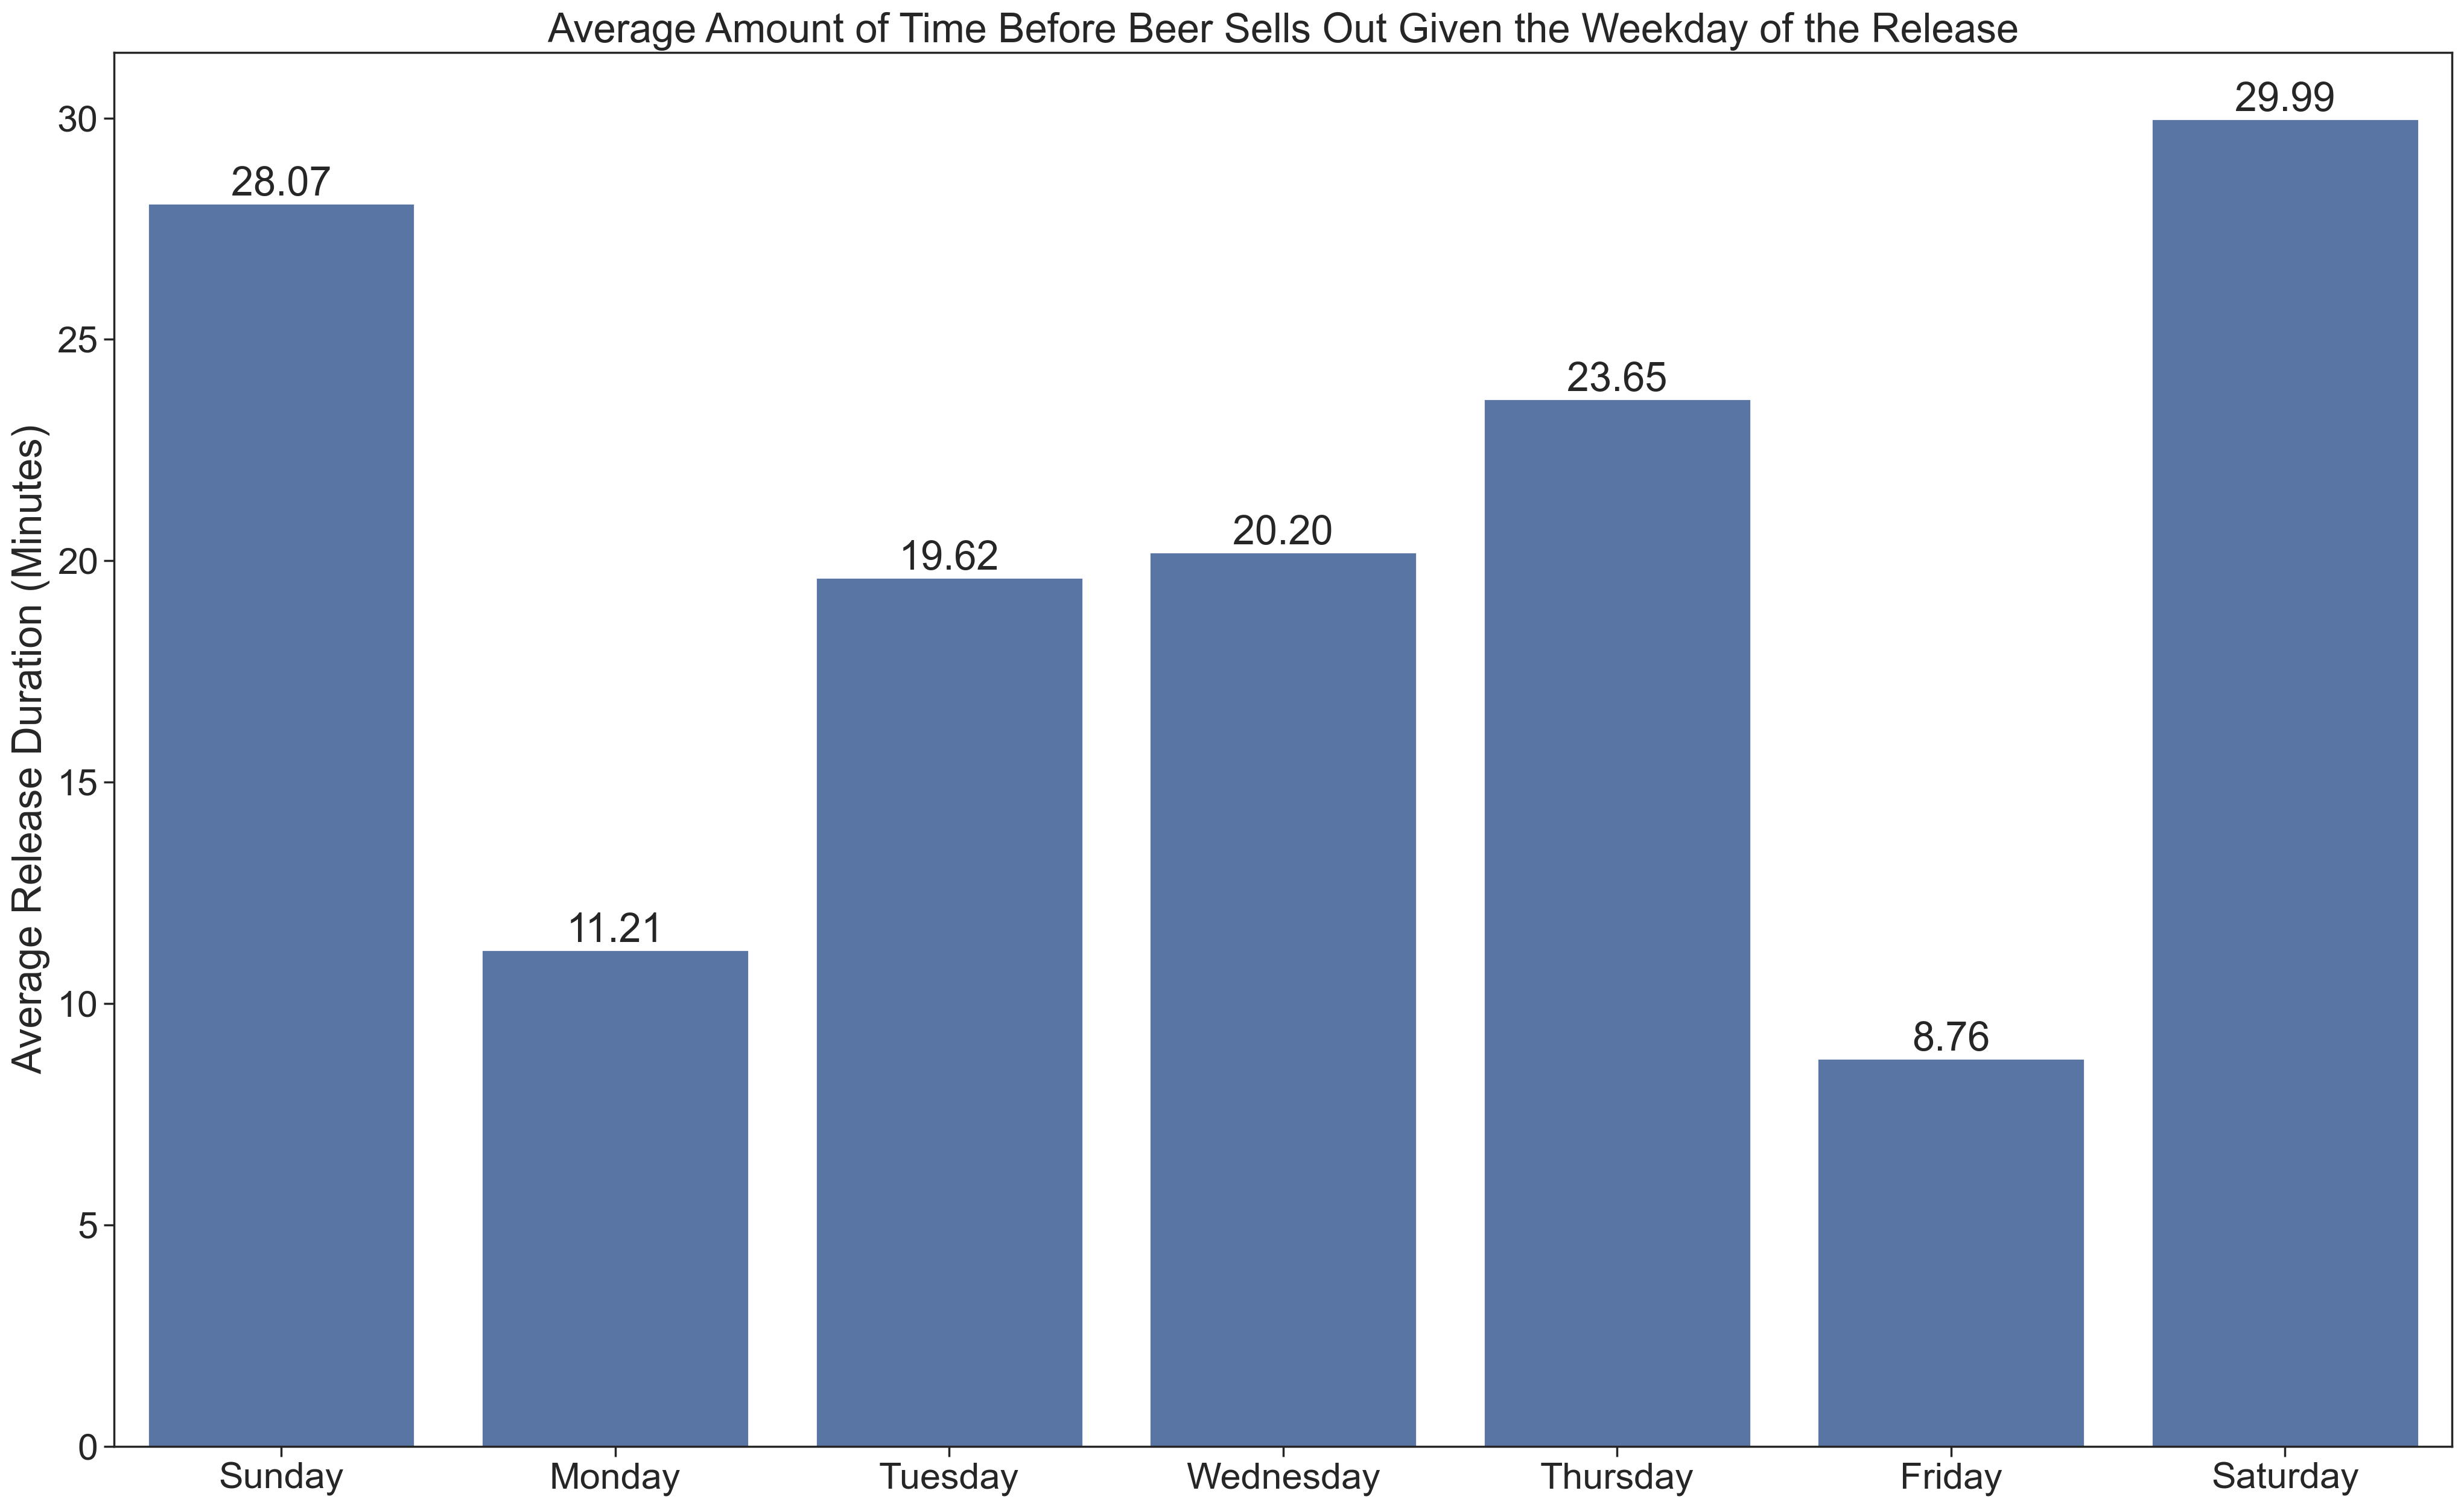

In [17]:
temp = df[df["release_post"] == True].groupby(["post_weekday"]).agg(
    {"release_duration_min" : "mean"}).reset_index()
ax = sns.barplot(temp, x="post_weekday", y="release_duration_min", order=order)
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.2f")
ax.set_ylabel("Average Release Duration (Minutes)")
ax.set_xlabel("")
ax.set_title("Average Amount of Time Before Beer Sells Out Given the Weekday of the Release")
plt.show()

In [18]:
# WIP
# temp = df[df["release_post"] == True].groupby(["post_month_num", "post_year"]).agg(
#     {"beer_abv" : "mean"}).reset_index()
# temp["Post Date"] = temp.apply(
#     lambda x : date(month=int(x["post_month_num"]), year=int(x["post_year"]), day=1), axis=1)
# temp

# ax = sns.lineplot(data=temp, x="Post Date", y="beer_abv", linewidth=3)
# plt.show()

---

In [19]:
df.columns

Index(['id', 'URL', 'likes', 'post_weekday', 'post_month', 'post_day',
       'post_year', 'release_post', 'release_duration_min',
       'release_start_hour_24', 'release_end_hour_24',
       'days_since_previous_release', 'release_cans', 'release_pp',
       'beer_name', 'beer_abv', 'beer_description', 'release_preorder',
       'post_month_num', 'post_date', 'Release Duration Group'],
      dtype='object')

In [20]:
temp = df[df["likes"].notnull()].query("post_year >= 2023").copy()
temp["post_date_ordinal"] = temp["post_date"].apply(datetime.toordinal)
temp = pandas.get_dummies(temp, columns=["release_preorder"], drop_first=True, dtype=int)
lr = LinearRegression().fit(temp[["post_date_ordinal", "release_preorder_True"]], temp["likes"])
lr.score(temp[["post_date_ordinal", "release_preorder_True"]], temp["likes"])

0.3970968138987132

In [21]:
lr.coef_

array([  -0.45355056, -144.43708624])

In [22]:
lr.intercept_

np.float64(336350.09804740647)

In [23]:
temp["pred"] = lr.predict(temp[["post_date_ordinal", "release_preorder_True"]])
temp["pred"]

382    1247.687660
383    1244.059255
384    1241.337952
385    1239.070199
386    1381.693083
          ...     
528     868.972943
529     867.158741
530    1010.235175
531    1008.420973
532    1007.060321
Name: pred, Length: 151, dtype: float64

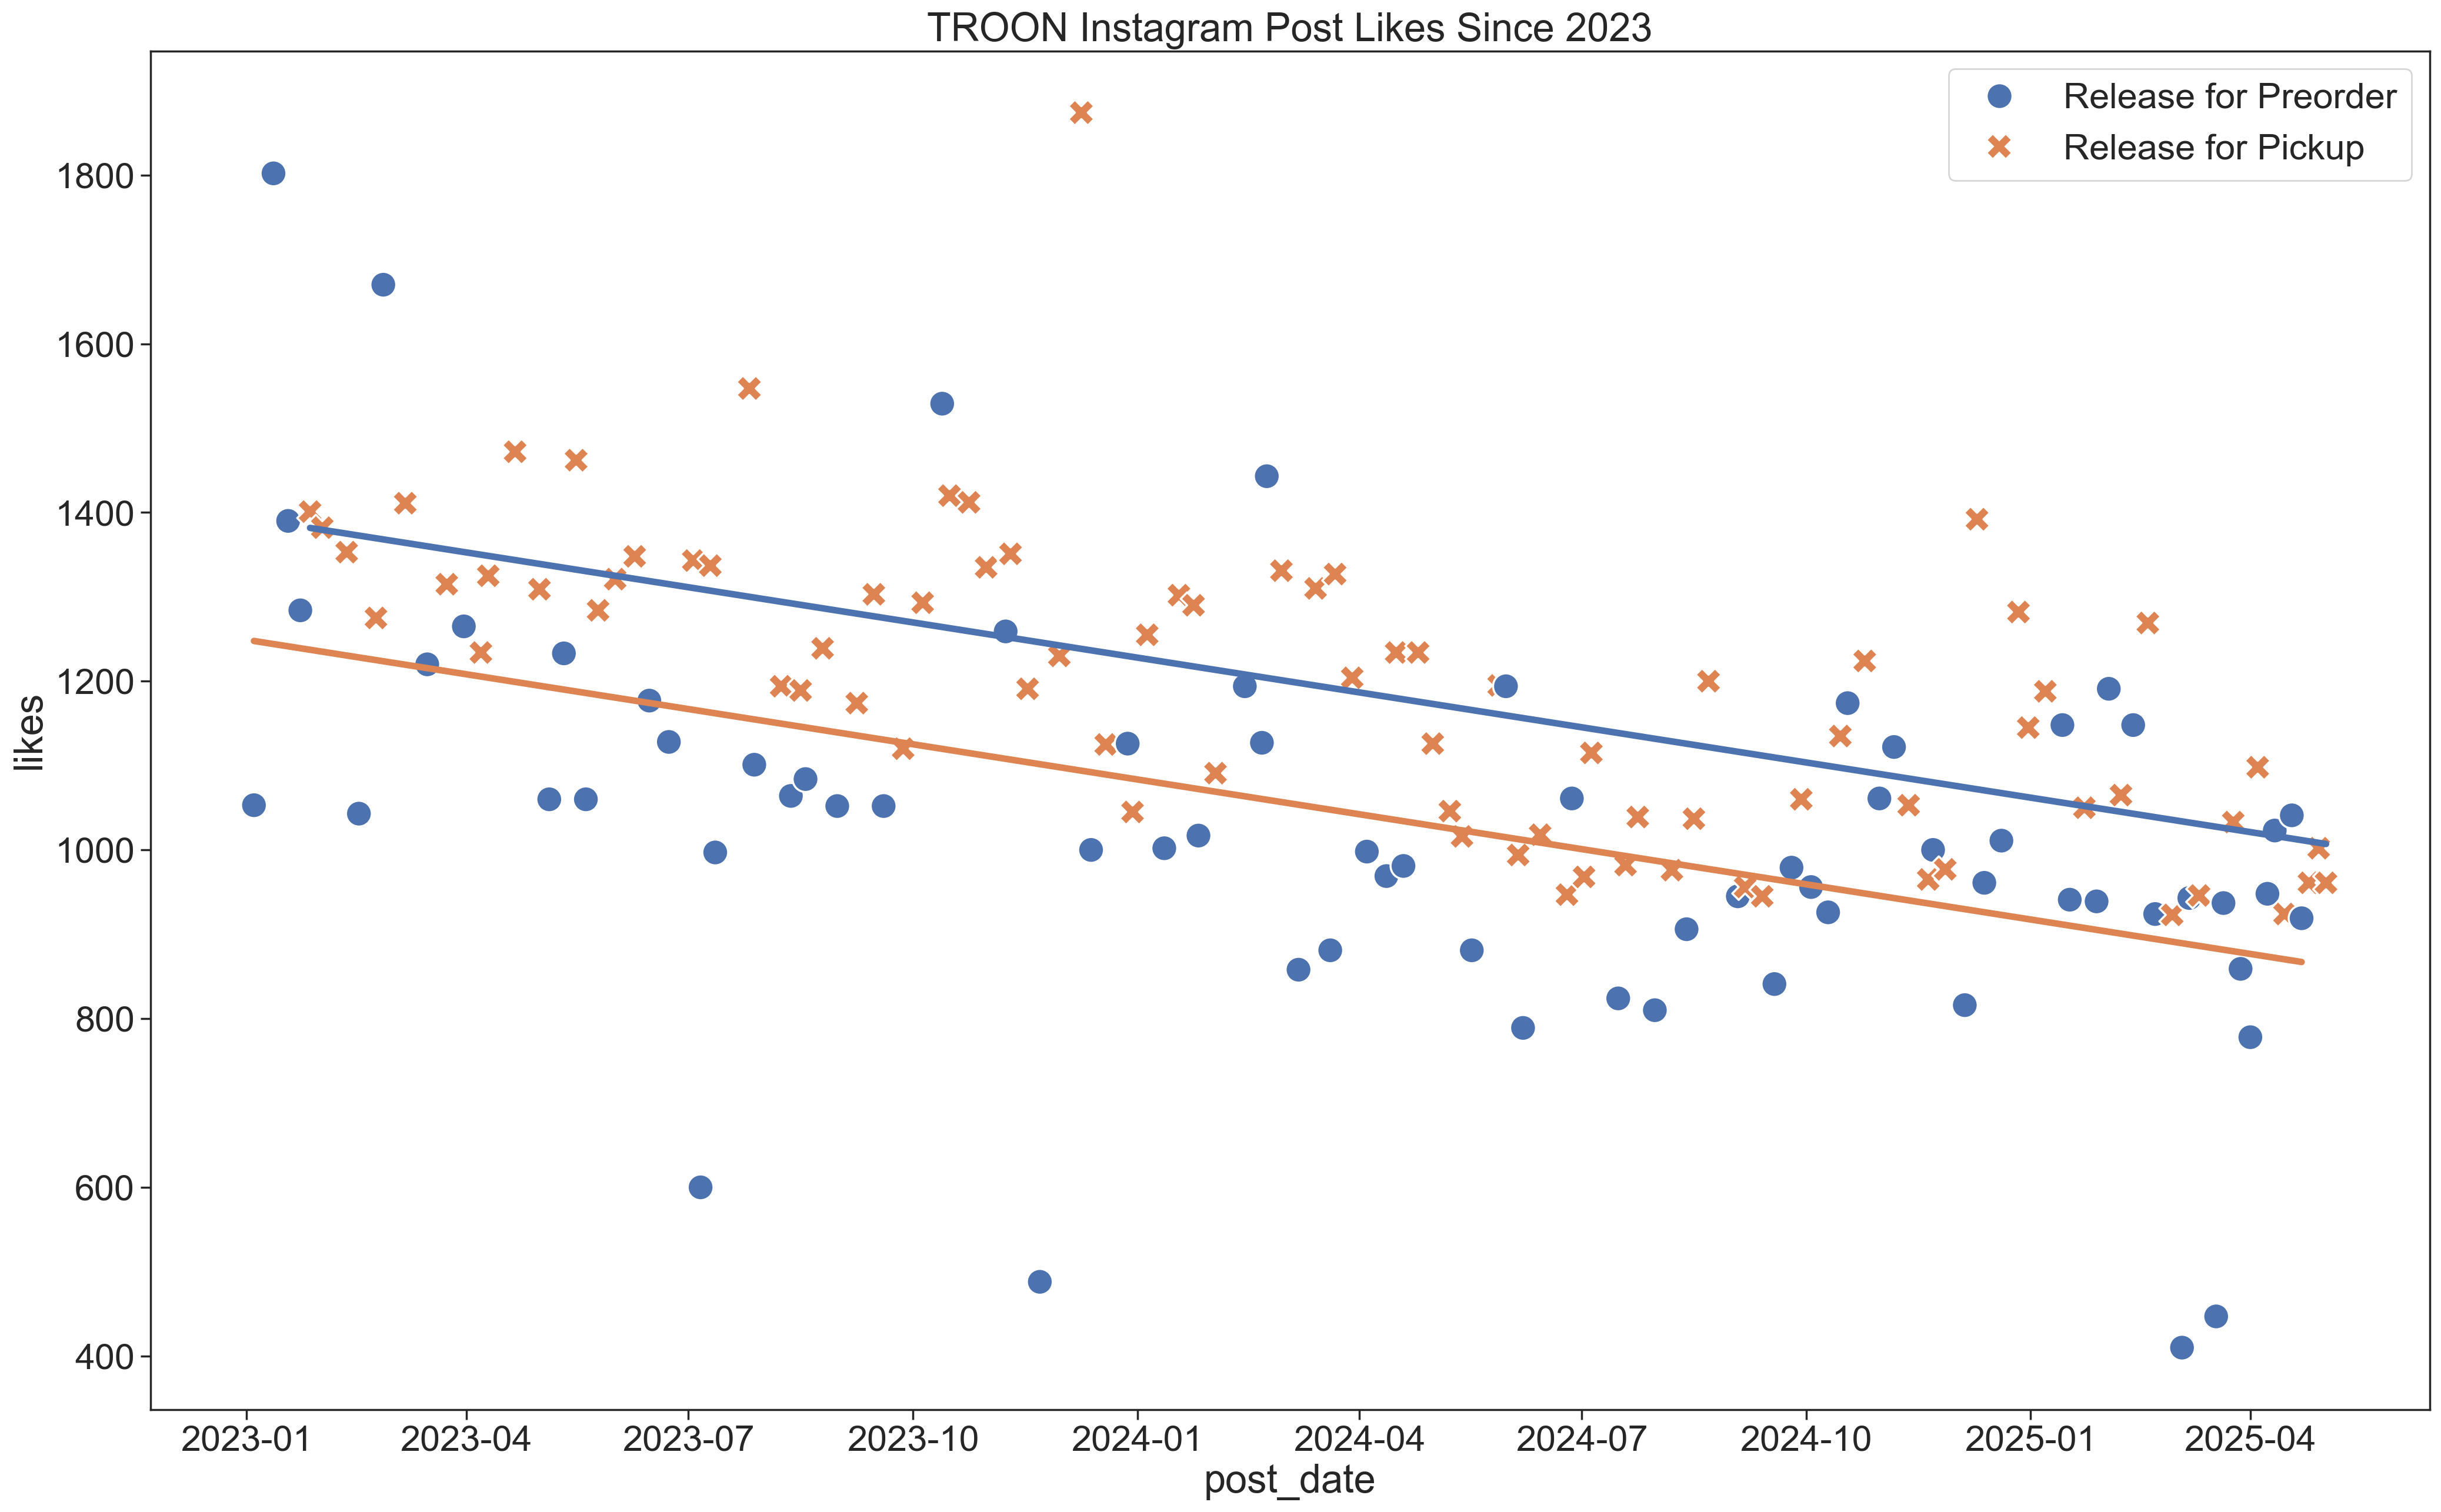

In [24]:
# ax = sns.lineplot(data=temp, x="post_date", y="likes", linewidth=4, color="lightgrey", label="Actual Likes Per Post/Date")

ax = sns.scatterplot(
    data=temp.assign(preorder=temp["release_preorder_True"].map({0 : "Release for Pickup", 1 : "Release for Preorder"})),
    x="post_date", y="likes", s=250, hue="preorder", style="preorder")

sns.lineplot(data=temp[temp["release_preorder_True"] == 0], x="post_date", y="pred", linewidth=4, ax=ax)
sns.lineplot(data=temp[temp["release_preorder_True"] == 1], x="post_date", y="pred", linewidth=4, ax=ax)

# sns.lineplot(x=temp["post_date"],
#              y=lr.predict(temp[["post_date_ordinal", "release_preorder_True"]]),
#              linewidth=4,
#              # color="tab:orange",
#              hue=temp["release_preorder_True"],
#              ax=ax,
#              label="Predicted (Trend) in Likes Per Post/Date")
ax.set_title("TROON Instagram Post Likes Since 2023")
ax.legend()
plt.show()

---

<Axes: xlabel='beer_abv', ylabel='Count'>

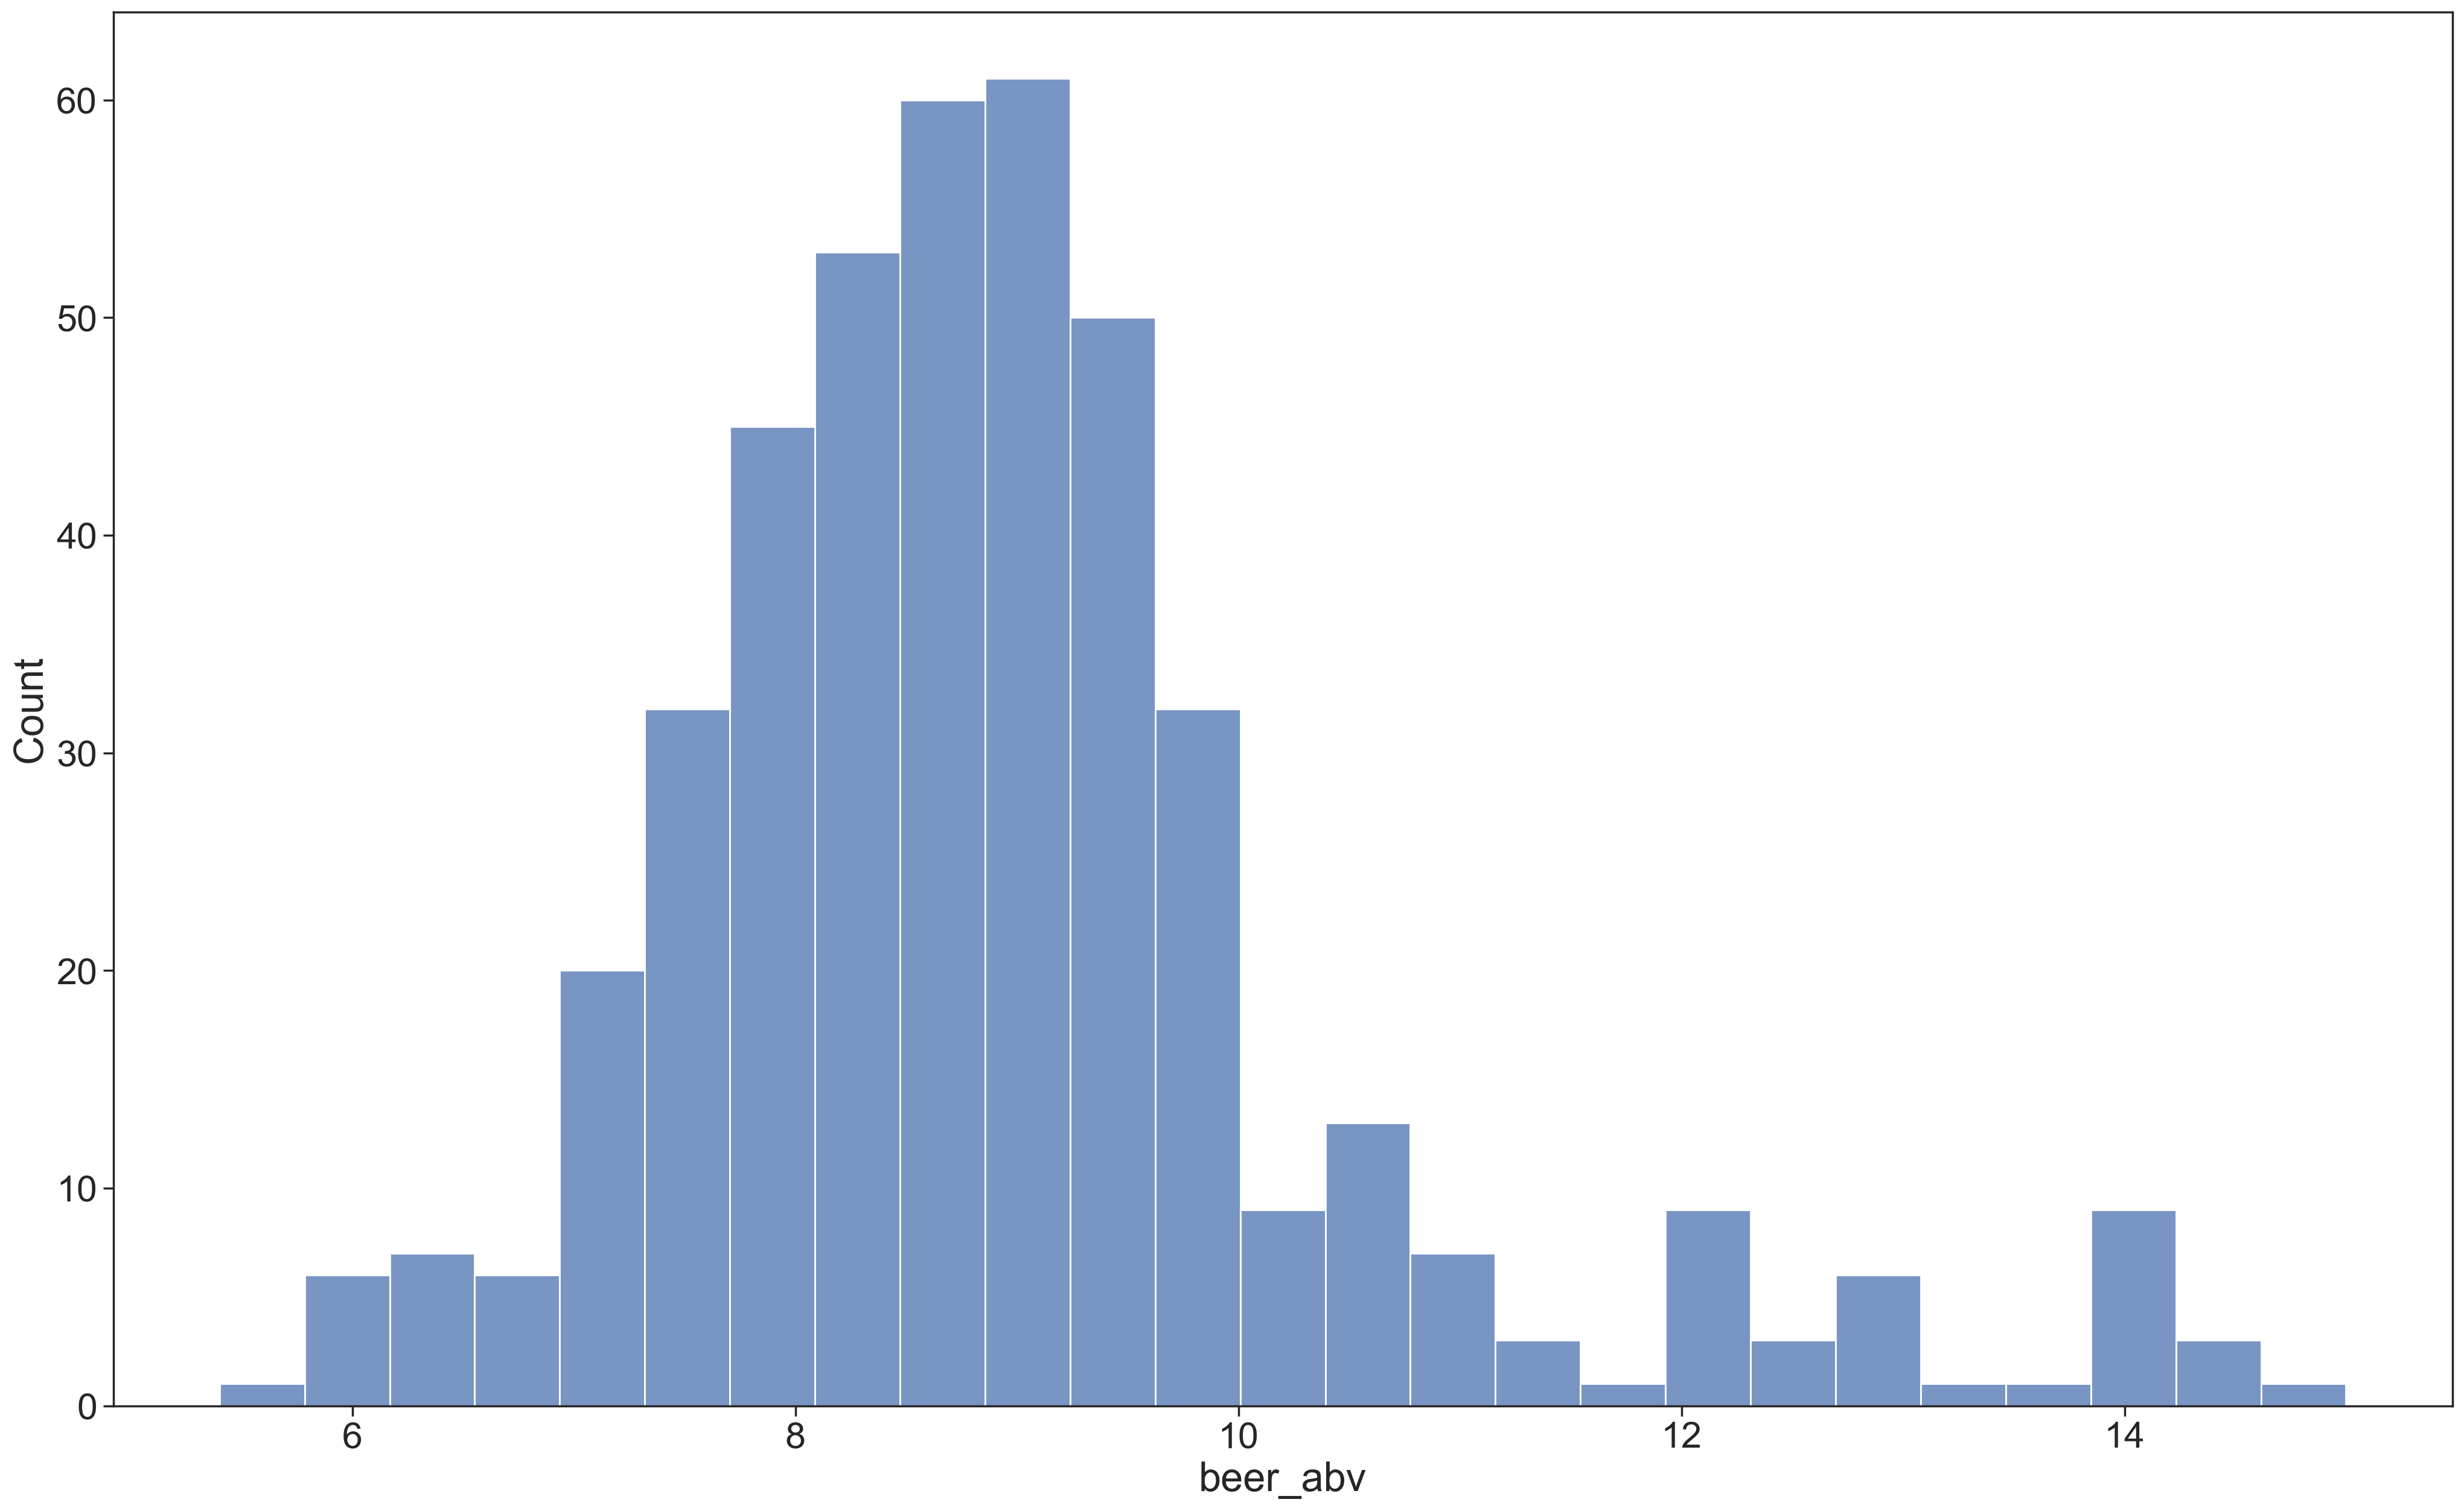

In [31]:
sns.histplot(x=df["beer_abv"])

In [32]:
df[["days_since_previous_release", "beer_abv"]].corr()

,days_since_previous_release,beer_abv
days_since_previous_release,1.000000,-0.134611
beer_abv,-0.134611,1.000000


<Axes: xlabel='days_since_previous_release', ylabel='beer_abv'>

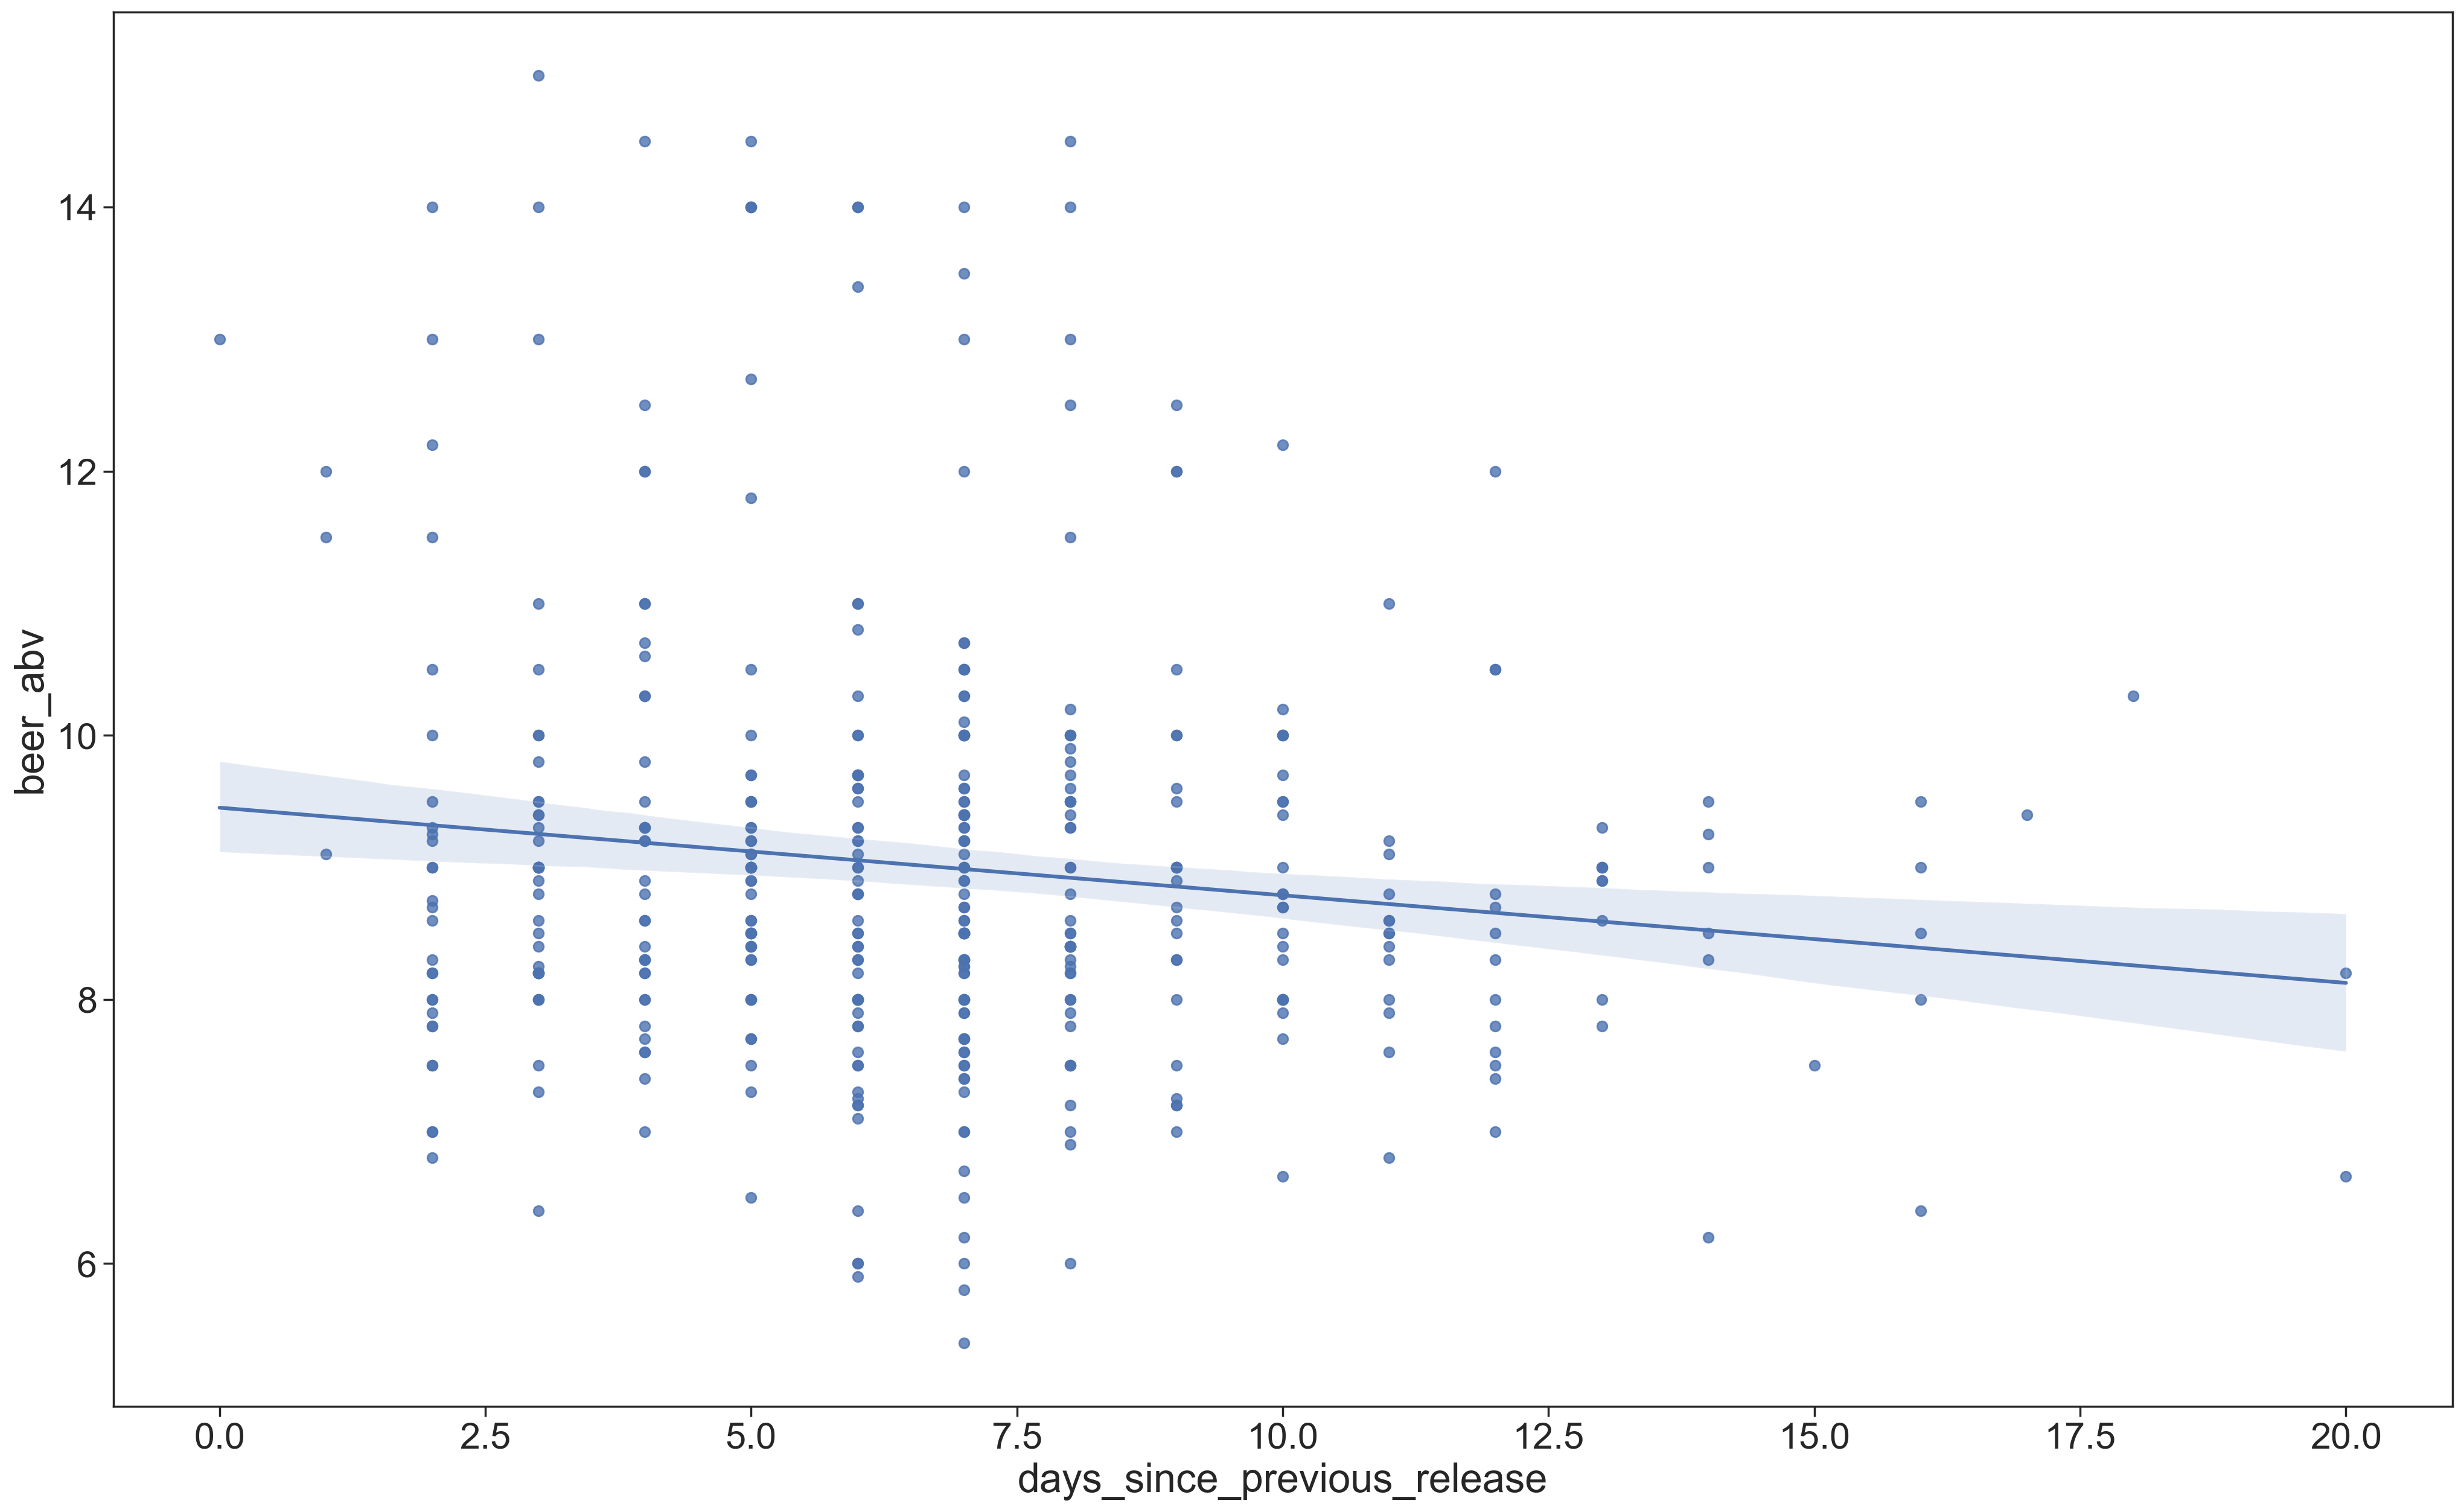

In [33]:
sns.regplot(data=df, x="days_since_previous_release", y="beer_abv")

In [38]:
temp = df[(df["days_since_previous_release"].notnull()) & (df["beer_abv"].notnull())].copy()
lr = LinearRegression().fit(temp[["days_since_previous_release"]], temp["beer_abv"])

In [39]:
lr.intercept_

np.float64(9.451996166074249)

In [40]:
lr.coef_

array([-0.06635408])

In [41]:
lr.score(temp[["days_since_previous_release"]], temp["beer_abv"])

0.018120141249455712

In [43]:
temp[["days_since_previous_release", "beer_abv"]]

,days_since_previous_release,beer_abv
50,9.0,7.20
55,20.0,6.66
56,6.0,5.90
57,6.0,6.00
60,9.0,7.50
...,...,...
528,3.0,9.00
529,4.0,7.40
530,3.0,9.40
531,4.0,10.30


In [49]:
df.groupby(["post_year"])["beer_abv"].describe()

,count,mean,std,min,25%,50%,75%,max
post_year,,,,,,,,
2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,35.0,8.098857,1.409146,5.9,7.000,8.00,9.000,12.0
2018,42.0,8.928571,1.335224,5.8,8.000,8.75,9.650,12.0
2019,53.0,9.320755,1.996666,5.4,8.000,8.90,9.800,15.0
2020,46.0,9.415435,2.197166,6.0,7.925,8.80,10.000,14.5
2021,55.0,8.833636,1.458470,6.0,8.000,8.70,9.150,14.0
2022,57.0,8.699123,1.101642,6.0,8.000,8.50,9.250,12.0
2023,58.0,9.117241,1.504979,6.8,8.300,8.65,9.600,14.0
2024,65.0,9.241538,1.407224,7.0,8.400,9.00,9.500,14.0
